<a href="https://colab.research.google.com/github/MaharshiYeluri01/FaceBookRobotorNotChallenge/blob/master/RobotORNOTfbChallenge_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!ls -lha kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 70 Jan  7 11:37 kaggle.json


In [0]:
!kaggle competitions download -c facebook-recruiting-iv-human-or-bot

  0% 0.00/115k [00:00<?, ?B/s]
100% 115k/115k [00:00<00:00, 34.9MB/s]
  0% 0.00/193k [00:00<?, ?B/s]
100% 193k/193k [00:00<00:00, 59.8MB/s]
  0% 0.00/264k [00:00<?, ?B/s]
100% 264k/264k [00:00<00:00, 35.4MB/s]
 97% 241M/248M [00:01<00:00, 153MB/s]
100% 248M/248M [00:01<00:00, 147MB/s]


In [0]:
import zipfile
zip_ref = zipfile.ZipFile("./bids.csv.zip", 'r')
zip_ref.extractall('data')
zip_ref = zipfile.ZipFile("./test.csv.zip", 'r')
zip_ref.extractall('data')
zip_ref = zipfile.ZipFile("./train.csv.zip", 'r')
zip_ref.extractall('data')

zip_ref.close()

In [0]:
import pandas as pd

In [0]:
bids=pd.read_csv('./data/bids.csv')
train_data=pd.read_csv('./data/train.csv')
test_data=pd.read_csv('./data/test.csv')

In [0]:
train_data.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0


In [0]:
test_data.head()

,bidder_id,payment_account,address
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,a3d2de7675556553a5f08e4c88d2c228htx90,5d9fa1b71f992e7c7a106ce4b07a0a754le7c
1,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228rs17i,a3d2de7675556553a5f08e4c88d2c228klidn
2,6b601e72a4d264dab9ace9d7b229b47479v6i,925381cce086b8cc9594eee1c77edf665zjpl,a3d2de7675556553a5f08e4c88d2c228aght0
3,eaf0ed0afc9689779417274b4791726cn5udi,a3d2de7675556553a5f08e4c88d2c228nclv5,b5714de1fd69d4a0d2e39d59e53fe9e15vwat
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,a3d2de7675556553a5f08e4c88d2c228dtdkd,c3b363a3c3b838d58c85acf0fc9964cb4pnfa


In [0]:
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3




• bid id - unique id for this bid

• bidder_id - Unique identifier of a bidder (same as the bidder_id used in train.csv and test.csv) 

• auction - Unique identifier of an auction 

• merchandise - The category of the auction site campaign, which means the bidder might come to    this site by way of searching for "home goods" but ended up bidding for "sporting goods" - and that leads to this field being "home goods.. This categorical field could be a search term, or online advertisement.

• device - Phone model of a visitor

• time - Time that the bid is made (transformed to protect privacy).

• country - The country that the IP belongs to 

• ip - IP address of a bidder (obfuscated to protect privacy).

• url - url where the bidder was referred from (obfuscated to protect privacy). 

• bidder_id - Unique identifier of a bidder.

• payment_account - Payment account associated with a bidder. These are obfuscated to protect privacy. 

• address - Mailing address of a bidder. These are obfuscated to protect privacy. 

• outcome - Label of a bidder indicating whether or not it is a robot. Value 1.0 indicates a robot, where value 0.0 indicates human. 


In [0]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train_data['outcome'].value_counts()

0.0    1910
1.0     103
Name: outcome, dtype: int64

In [0]:
len(train_data['bidder_id'])

2013

In [0]:
len(test_data['bidder_id'])

4700

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


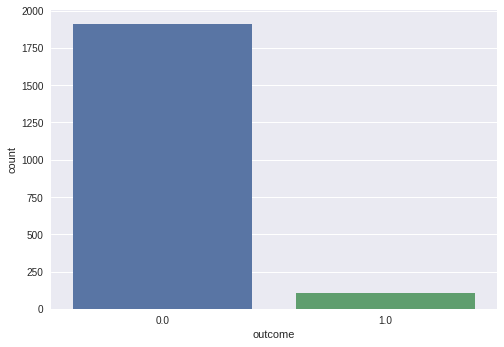

In [0]:
sns.countplot(train_data['outcome'])

In [0]:
len(bids)

7656334

In [0]:
len(bids['bidder_id'].unique())

6614

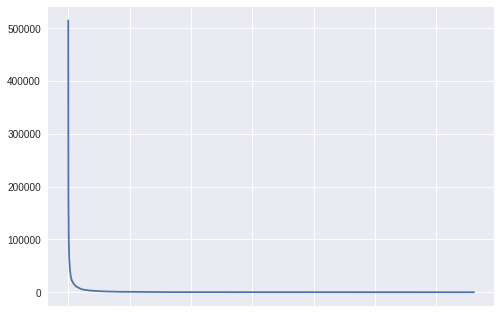

In [0]:
bids['bidder_id'].value_counts().plot()

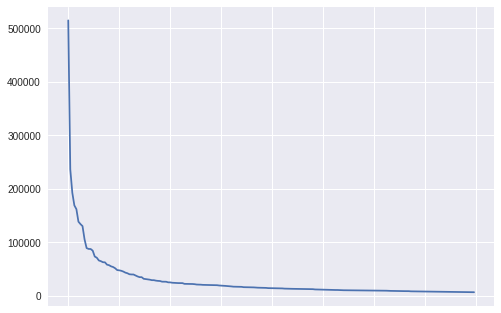

In [0]:
bids['bidder_id'].value_counts()[:200].plot()

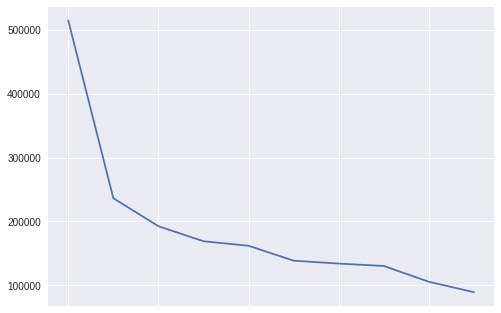

In [0]:
bids['bidder_id'].value_counts()[:10].plot()

In [0]:
nb_p_user=list(bids['bidder_id'].value_counts())

In [0]:
for i in range(10,101,10):
  print("{} th percentile for number of bids by each user {}".format(i,np.percentile(nb_p_user,i)))

10 th percentile for number of bids by each user 1.0
20 th percentile for number of bids by each user 2.0
30 th percentile for number of bids by each user 4.0
40 th percentile for number of bids by each user 8.0
50 th percentile for number of bids by each user 18.0
60 th percentile for number of bids by each user 44.0
70 th percentile for number of bids by each user 113.09999999999945
80 th percentile for number of bids by each user 328.40000000000055
90 th percentile for number of bids by each user 1298.5999999999985
100 th percentile for number of bids by each user 515033.0


In [0]:
for i in range(0,11):

  print("{} th percentile for number of bids by each user {}".format(99+i/10,np.percentile(nb_p_user,99+i/10)))

99.0 th percentile for number of bids by each user 20373.329999999994
99.1 th percentile for number of bids by each user 22004.245000000003
99.2 th percentile for number of bids by each user 23747.559999999838
99.3 th percentile for number of bids by each user 26349.724999999995
99.4 th percentile for number of bids by each user 30175.34400000036
99.5 th percentile for number of bids by each user 37886.17500000077
99.6 th percentile for number of bids by each user 46055.21599999968
99.7 th percentile for number of bids by each user 57337.54200000006
99.8 th percentile for number of bids by each user 72860.70400000075
99.9 th percentile for number of bids by each user 131718.02400000236
100.0 th percentile for number of bids by each user 515033.0


In [0]:

bids['bidder_id'].value_counts()[:9]

f5b2bbad20d1d7ded3ed960393bec0f40u6hn    515033
197e90906939267ace2422e78e8e83889znqp    236413
a58ace8b671a7531c88814bc86b2a34cf0crb    192565
13b022681839a351f07d017c0edd9ed6ao2w5    168995
9655ccc7c0c193f1549475f02c54dce45kjw7    161935
29c103503e1d6ace5626fb07a5ab0dafrtjvs    138576
3350dc181383b032a6542a61c67713f9lmevm    134018
0ea62aaa9c3ffcc6db584cb69c1f6c4bcripp    130266
aa5f360084278b35d746fa6af3a7a1a5ra3xe    105436
Name: bidder_id, dtype: int64

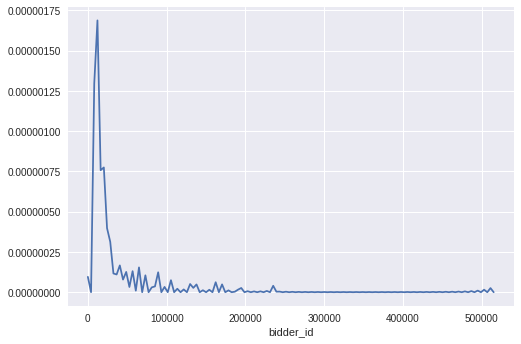

In [0]:
sns.distplot(bids['bidder_id'].value_counts(),hist=False)

In [0]:
len(bids['auction'].unique())

15051

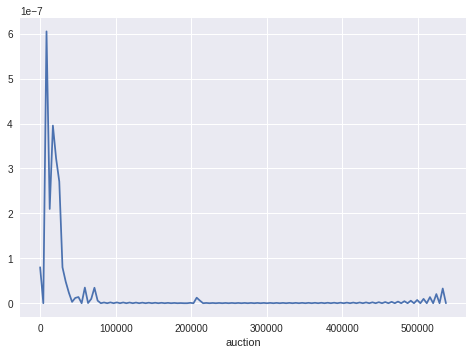

In [0]:
sns.distplot(bids['auction'].value_counts(),hist=False)

In [0]:
for i in range(10,101,10):
  print("{} th percentile for number of bids by each user {}".format(i,np.percentile(list(bids['auction'].value_counts()),i)))

10 th percentile for number of bids by each user 2.0
20 th percentile for number of bids by each user 5.0
30 th percentile for number of bids by each user 10.0
40 th percentile for number of bids by each user 20.0
50 th percentile for number of bids by each user 38.0
60 th percentile for number of bids by each user 74.0
70 th percentile for number of bids by each user 138.0
80 th percentile for number of bids by each user 292.0
90 th percentile for number of bids by each user 817.0
100 th percentile for number of bids by each user 537347.0


In [0]:
for i in range(0,11):

  print("{} th percentile for number of bids by each user {}".format(99+i/10,np.percentile(list(bids['auction'].value_counts()),99+i/10)))

99.0 th percentile for number of bids by each user 7296.5
99.1 th percentile for number of bids by each user 7965.54999999997
99.2 th percentile for number of bids by each user 8780.600000000011
99.3 th percentile for number of bids by each user 9467.699999999993
99.4 th percentile for number of bids by each user 11407.700000000132
99.5 th percentile for number of bids by each user 16031.75
99.6 th percentile for number of bids by each user 18016.59999999991
99.7 th percentile for number of bids by each user 21727.20000000018
99.8 th percentile for number of bids by each user 23888.5
99.9 th percentile for number of bids by each user 29431.55000000094
100.0 th percentile for number of bids by each user 537347.0


In [0]:
groupby_bidderid=bids.groupby(by='bidder_id')

In [0]:
bidders_auction=[]
bidders=[]
for bidder,frame in groupby_bidderid:
  bidders.append(bidder)
  val=len(frame['auction'].unique())
  bidders_auction.append(val)

Text(0,0.5,'No of Unique auctions Each User patricipated')

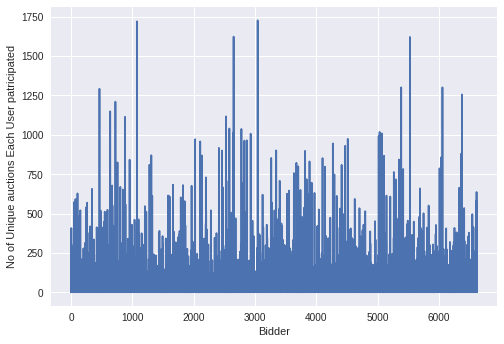

In [0]:
plt.plot(bidders_auction)
plt.xlabel("Bidder")
plt.ylabel("No of Unique auctions Each User patricipated")

We can clearly see few bidders participating in all the auctions let's see what happening with those bidders

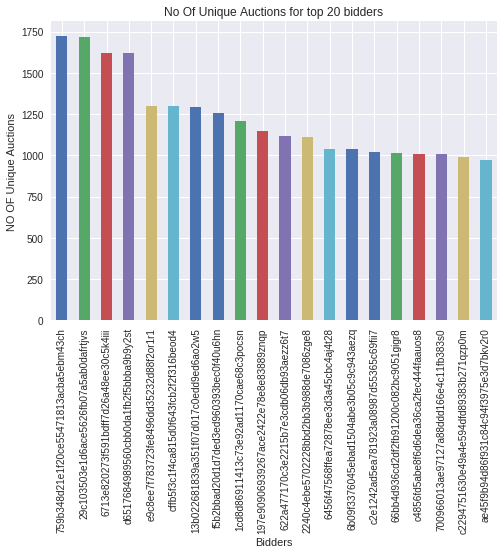

In [0]:
indeces=np.array(bidders_auction).argsort()
unique_auctions=np.array(bidders_auction)[indeces[-20:]]
bidders_sample=np.array(bidders)[indeces[-20:]]
unique_auctions = unique_auctions[::-1]
bidders_sample = bidders_sample[::-1]
s=pd.Series(data=unique_auctions,index=bidders_sample)
i=np.arange(20)
s.plot(kind='bar')
plt.title('No Of Unique Auctions for top 20 bidders')
plt.xlabel('Bidders')
plt.ylabel('NO OF Unique Auctions')
plt.show()

In [0]:
auctions_bidders=[]
for bidder,frame in groupby_bidderid:
  val=frame['auction'].value_counts()
  auctions_bidders.append(val)


No of  unique auctions bidder 759b348d21e1f20ce55471813acba5ebm43ch was participated is  1726


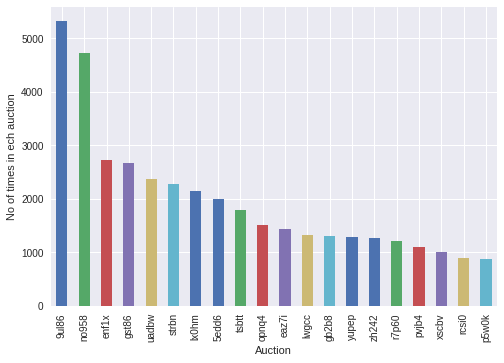

No of  unique auctions bidder 29c103503e1d6ace5626fb07a5ab0dafrtjvs was participated is  1720


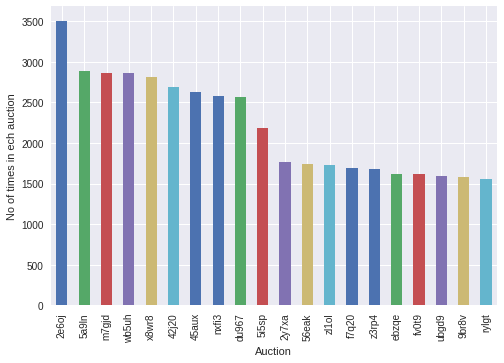

No of  unique auctions bidder 6713e820273f591bdff7d26a48ee30c5k4iii was participated is  1623


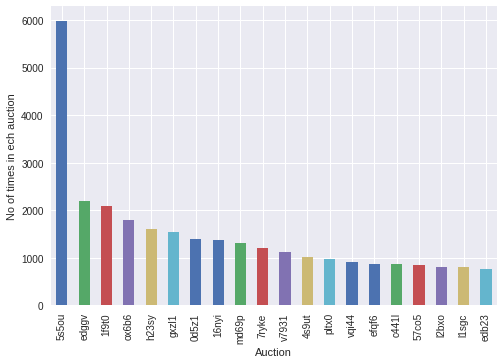

No of  unique auctions bidder d6517684989560cbb0da1fb2f5bbba9b9y2st was participated is  1621


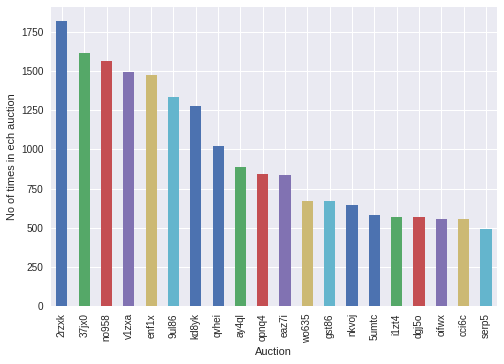

No of  unique auctions bidder e9c8ee7f783723fe8496dd35232d88f2or1r1 was participated is  1301


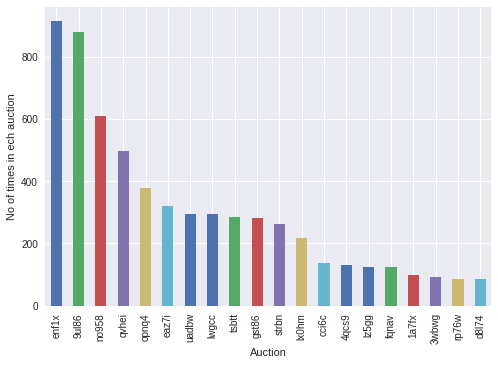

No of  unique auctions bidder cffb5f3c1f4ca815d0f643fcb2f2f316beod4 was participated is  1301


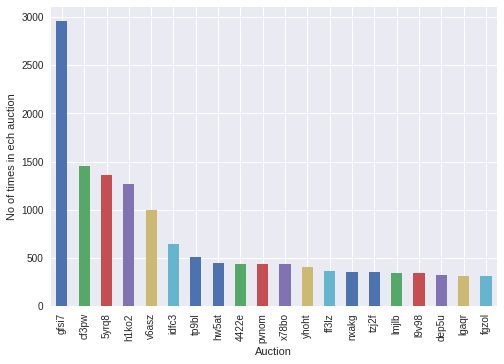

No of  unique auctions bidder 13b022681839a351f07d017c0edd9ed6ao2w5 was participated is  1292


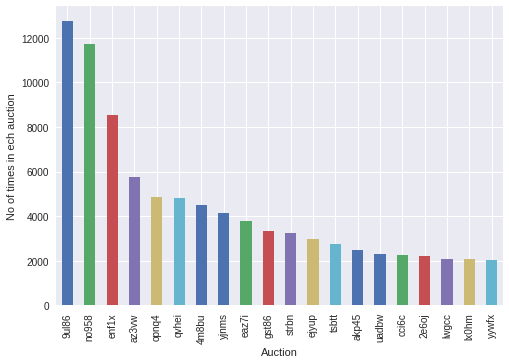

No of  unique auctions bidder f5b2bbad20d1d7ded3ed960393bec0f40u6hn was participated is  1256


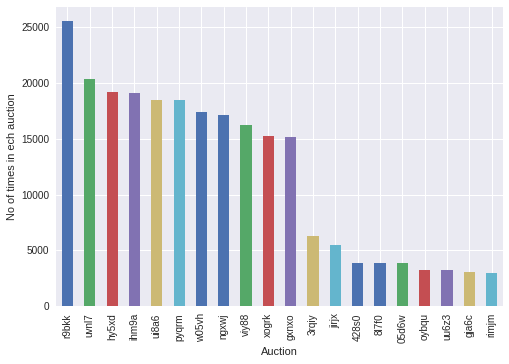

No of  unique auctions bidder 1cd8d86911413c73e92ad1170cae68c3pocsn was participated is  1210


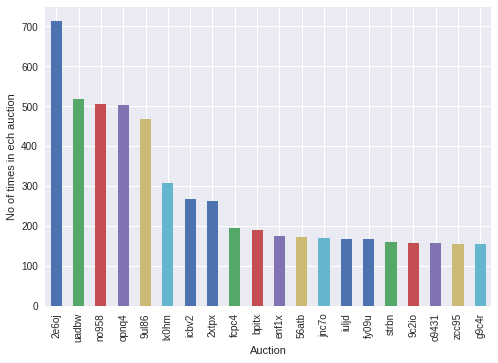

No of  unique auctions bidder 197e90906939267ace2422e78e8e83889znqp was participated is  1149


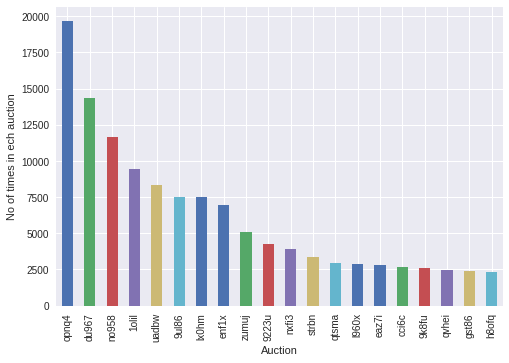

No of  unique auctions bidder 622a477170c3e2215b7e3cdb06db93aezz6t7 was participated is  1117


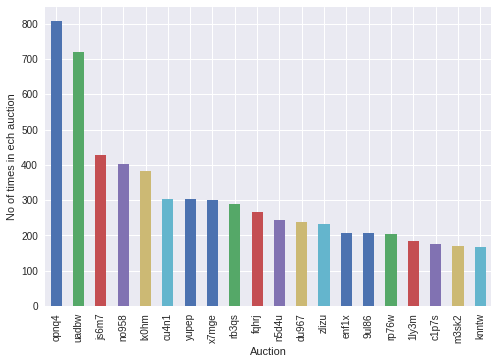

No of  unique auctions bidder 2240c4ebe5702228bbd2bb3b988de7086zge8 was participated is  1114


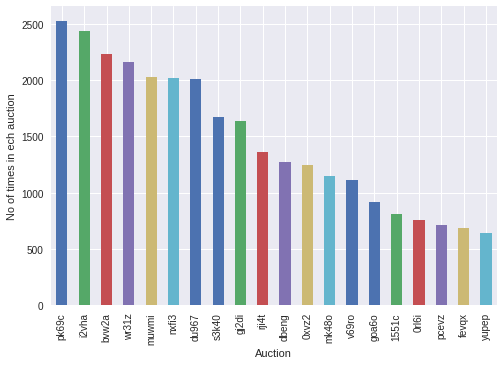

No of  unique auctions bidder 6456f47568ffea72878ee3d3a45cbc4aj4t28 was participated is  1040


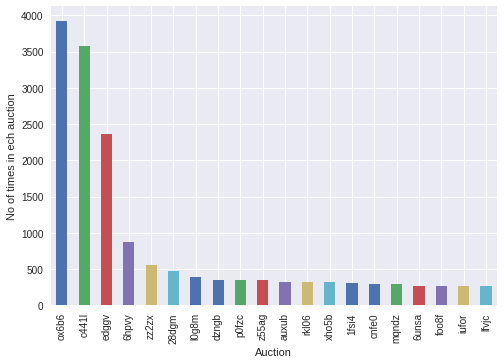

No of  unique auctions bidder 6b09f3376045ebad1504abe3b05c9c943aezq was participated is  1037


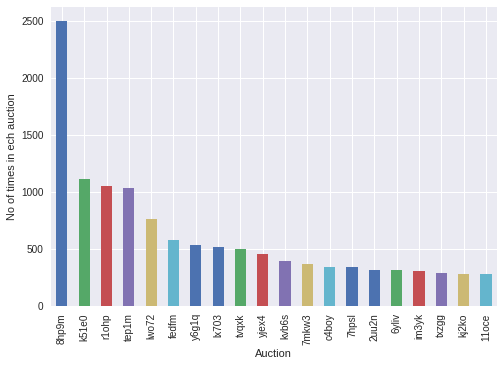

No of  unique auctions bidder c2e1242ad5ea781923a08987d55365c69fii7 was participated is  1018


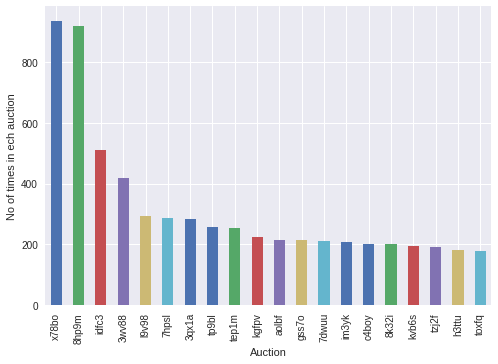

No of  unique auctions bidder 66bb4d936cd2df2fb91200c082bc9051gigr8 was participated is  1015


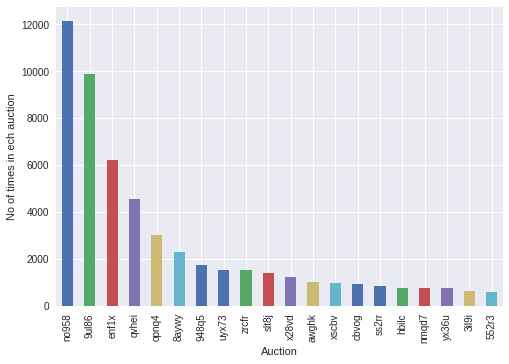

No of  unique auctions bidder c4856fd5abe8f6d6dea36ca2fec444faauos8 was participated is  1009


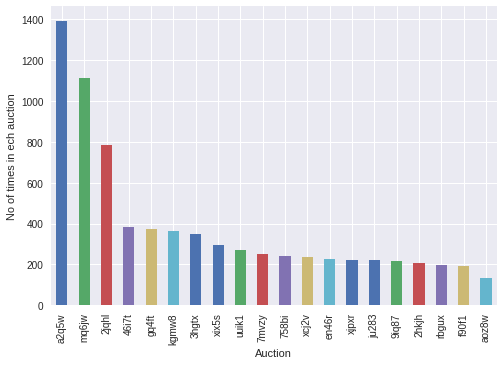

No of  unique auctions bidder 700966013ae97127a88ddd166e4c11fb383s0 was participated is  1007


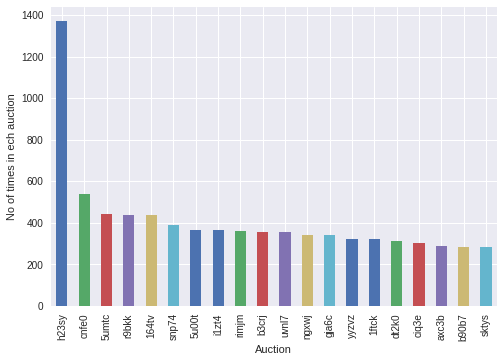

No of  unique auctions bidder c2294751630e49a4e594dfd89383b271qzp0m was participated is  991


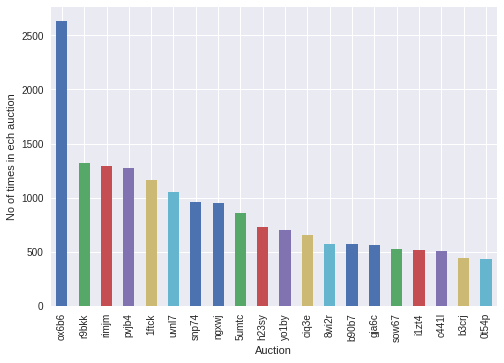

No of  unique auctions bidder ae45f9b94d86f931c84c94f3975e3d7bkv2r0 was participated is  974


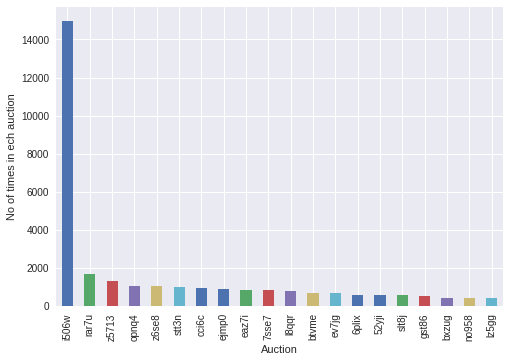

In [0]:
for i,val in enumerate(indeces[-20:][::-1]):
  print("No of  unique auctions bidder {} was participated is  {}".format(bidders[val],len(auctions_bidders[val])))
  auctions_bidders[val][:20].plot(kind='bar')
  plt.xlabel("Auction")
  plt.ylabel("No of times in ech auction")
  plt.show()

In [0]:
#percentage_of_no_of_bids_per_auction = pbpa
pbpa=(np.array(bids['auction'].value_counts())/bids.shape[0])*100

In [0]:
bidders_devices=[]
for bidder,frame in groupby_bidderid:
  val=len(frame['device'].unique())
  bidders_devices.append(val)


Text(0,0.5,'No of different devices used by each bidder')

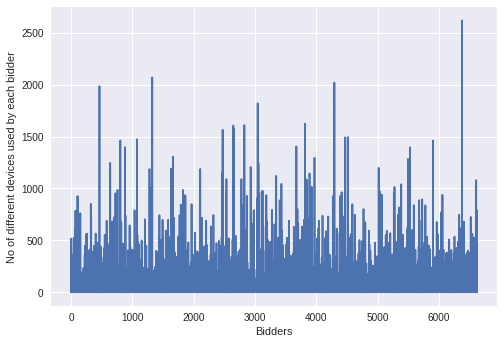

In [0]:
plt.plot(bidders_devices)
plt.xlabel("Bidders")
plt.ylabel("No of different devices used by each bidder")

In [0]:
bidders_country=[]
for bidder,frame in groupby_bidderid:
  val=len(frame['country'].unique())
  bidders_country.append(val)


Text(0,0.5,'no of different countries each bidder was shown from')

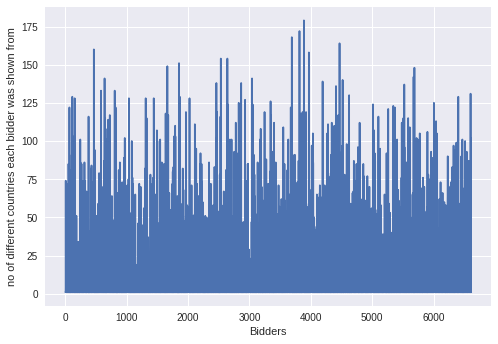

In [0]:
plt.plot(bidders_country)
plt.xlabel("Bidders")
plt.ylabel("no of different countries each bidder was shown from")

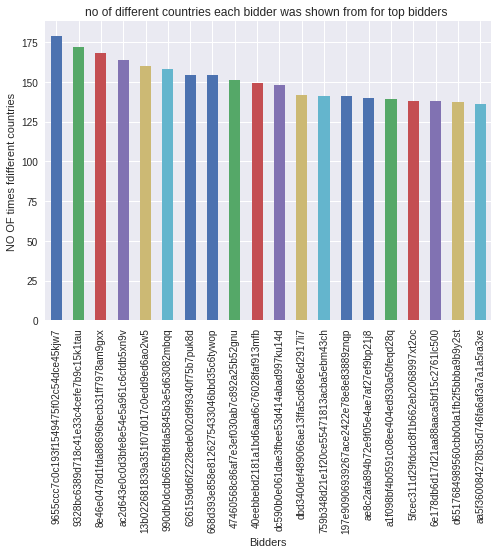

In [0]:
indeces=np.array(bidders_country).argsort()
unique_auctions=np.array(bidders_country)[indeces[-20:]]
bidders_sample=np.array(bidders)[indeces[-20:]]
unique_auctions = unique_auctions[::-1]
bidders_sample = bidders_sample[::-1]
s=pd.Series(data=unique_auctions,index=bidders_sample)
i=np.arange(20)
s.plot(kind='bar')
plt.title('no of different countries each bidder was shown from for top bidders ')
plt.xlabel('Bidders')
plt.ylabel('NO OF times fdifferent countries')
plt.show()

In [0]:
bidder_countries=[]
for bidder,frame in groupby_bidderid:
  val=frame['country'].value_counts()
  bidder_countries.append(val)


From total no of different countries for bidder  9655ccc7c0c193f1549475f02c54dce45kjw7 is 178


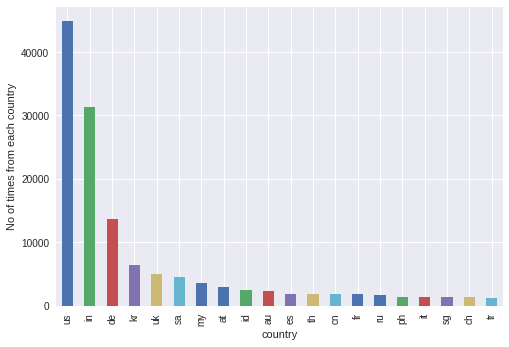

From total no of different countries for bidder  9328bc6389d718c41e33c4cefe7b9c15k1tau is 171


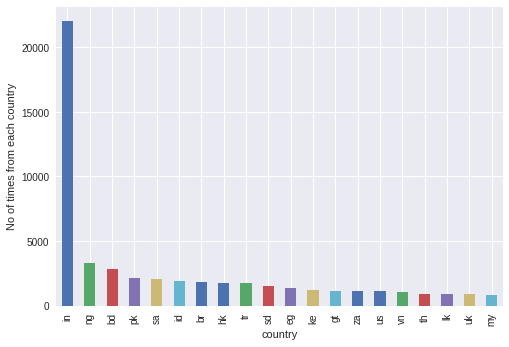

From total no of different countries for bidder  8e46e0478d1fda88696becb31ff7978am9gxx is 167


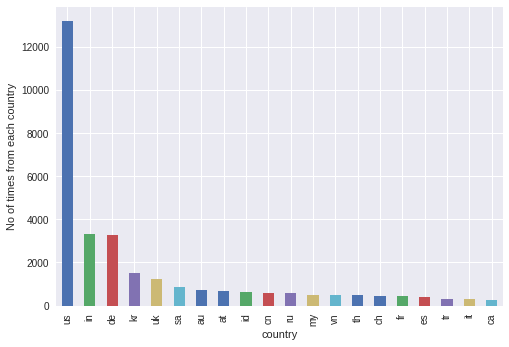

From total no of different countries for bidder  ac2d643e0c0d3bfe8e54e5a961c6cfdb5xn9v is 163


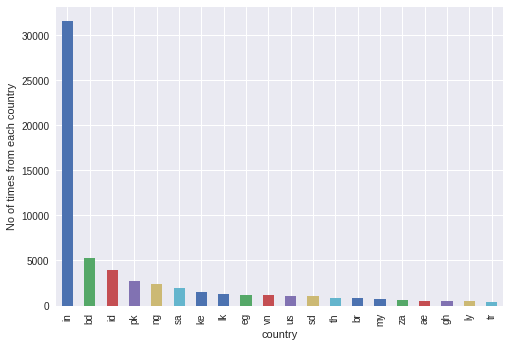

From total no of different countries for bidder  13b022681839a351f07d017c0edd9ed6ao2w5 is 160


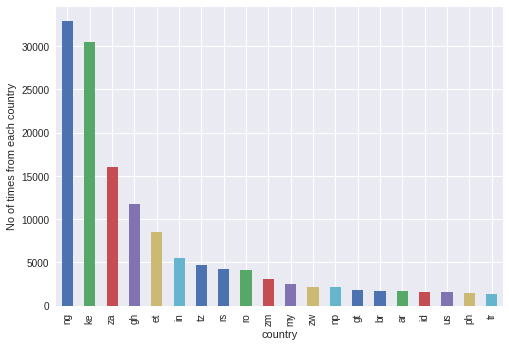

From total no of different countries for bidder  990db0dcdb665fb8fda5845b3e5d63082mbqq is 157


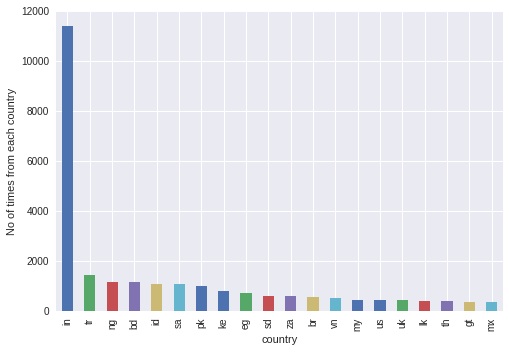

From total no of different countries for bidder  626159dd6f2228ede002d9f9340f75b7puk8d is 153


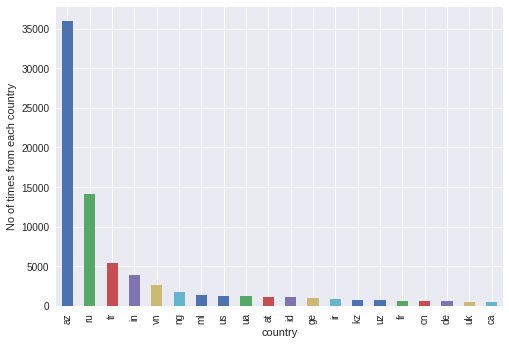

From total no of different countries for bidder  668d393e858e8126275433046bbd35c6tywop is 153


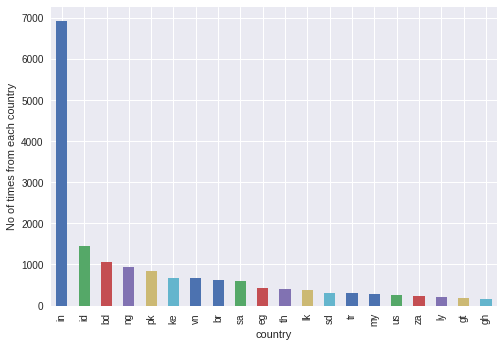

From total no of different countries for bidder  47460568c86af7e3ef030ab7c892a25b52gnu is 150


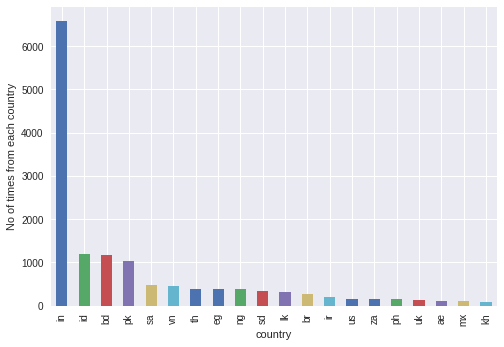

From total no of different countries for bidder  40eebbebd2181a1bd6aad6c76028faf913mfb is 148


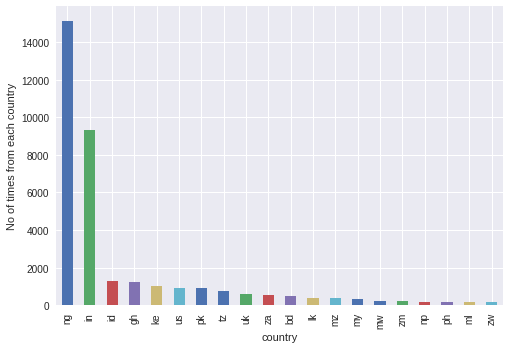

From total no of different countries for bidder  dc590b0e061dae3fbee53d414abad997ku14d is 147


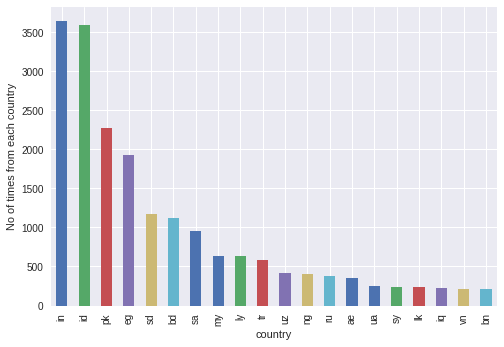

From total no of different countries for bidder  dbd340def489066ae13ffa5cd68e6d2917li7 is 141


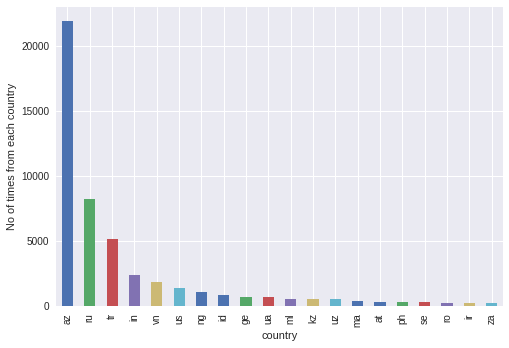

From total no of different countries for bidder  759b348d21e1f20ce55471813acba5ebm43ch is 141


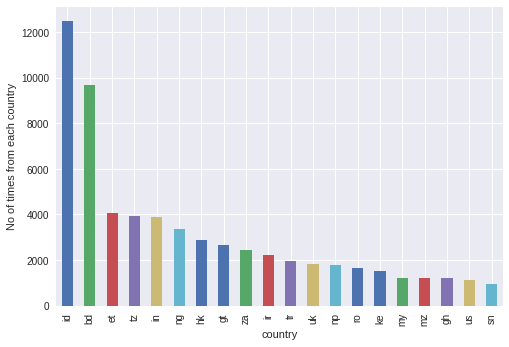

From total no of different countries for bidder  197e90906939267ace2422e78e8e83889znqp is 141


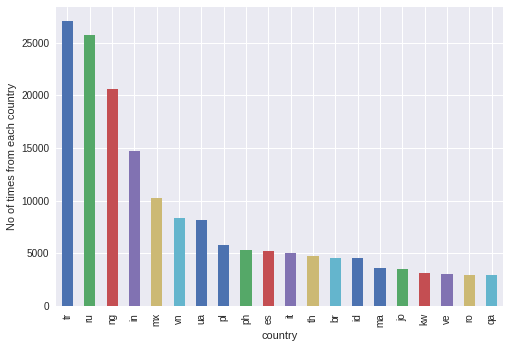

From total no of different countries for bidder  ae8c2afa894b72e9f05e4ae7af27ef9bp21j8 is 139


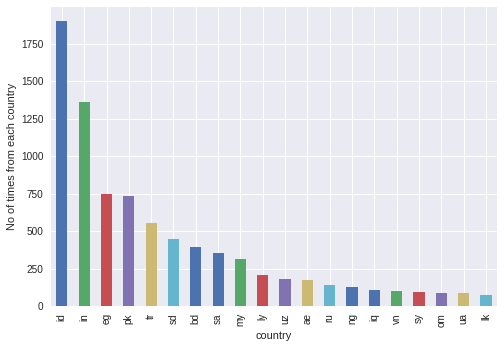

From total no of different countries for bidder  a1f098bf4b0591c08ee404ed930a50feqd28q is 138


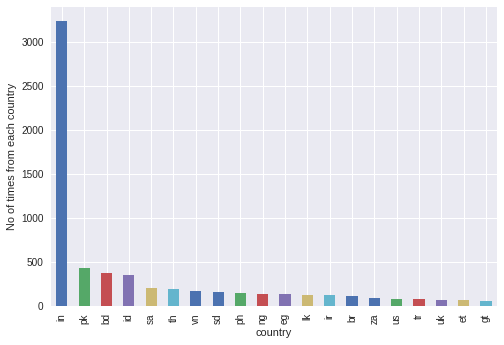

From total no of different countries for bidder  5fcec311d29fdcdc8f1b662eb2068997xt2oc is 138


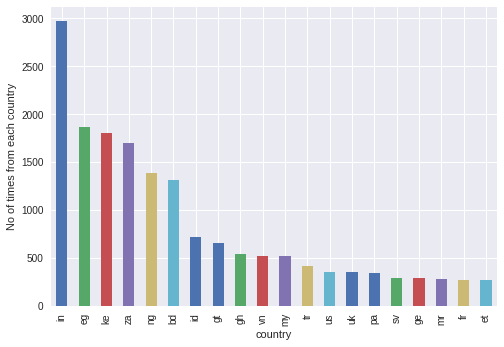

From total no of different countries for bidder  6e178db6d17d21aa88aaca5bf15c2761lc500 is 137


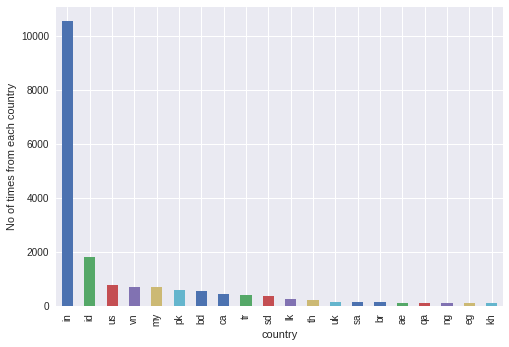

From total no of different countries for bidder  d6517684989560cbb0da1fb2f5bbba9b9y2st is 137


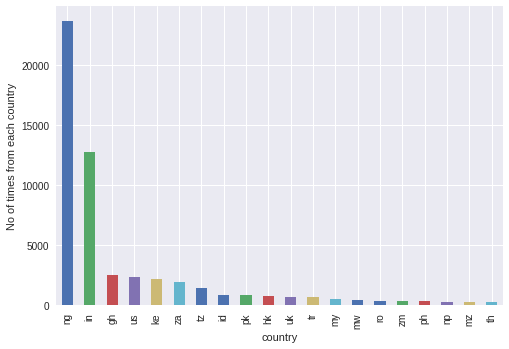

From total no of different countries for bidder  aa5f360084278b35d746fa6af3a7a1a5ra3xe is 136


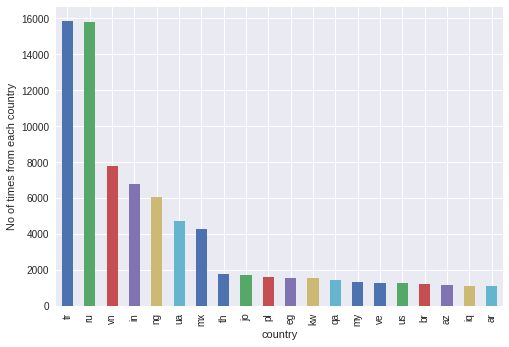

In [0]:
for i,val in enumerate(indeces[-20:][::-1]):
  print("From total no of different countries for bidder  {} is {}".format(bidders[val],len(bidder_countries[val])))
  bidder_countries[val][:20].plot(kind='bar')
  plt.xlabel("country")
  plt.ylabel("No of times from each country")
  plt.show()

Text(0,0.5,"no of different url's each bidder was shown from")

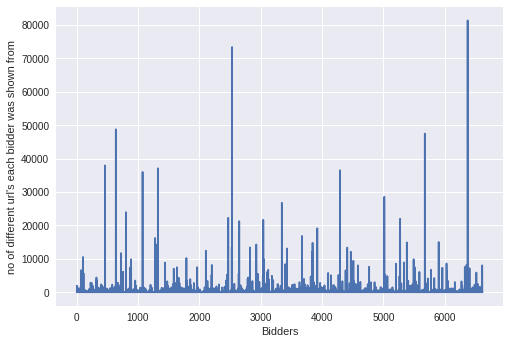

In [0]:
bidders_url=[]
for bidder,frame in groupby_bidderid:
  val=len(frame['url'].unique())
  bidders_url.append(val)
plt.plot(bidders_url)
plt.xlabel("Bidders")
plt.ylabel("no of different url's each bidder was shown from")

Text(0,0.5,"no of different ip's each bidder was shown from")

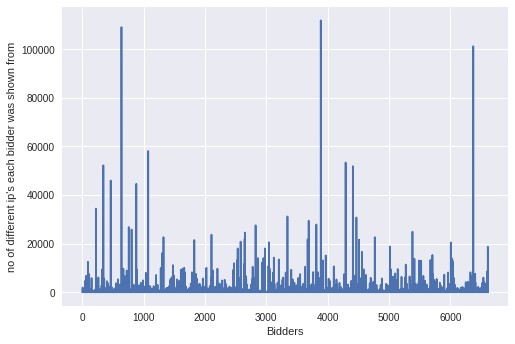

In [0]:
bidders_ip=[]
for bidder,frame in groupby_bidderid:
  val=len(frame['ip'].unique())
  bidders_ip.append(val)
plt.plot(bidders_ip)
plt.xlabel("Bidders")
plt.ylabel("no of different ip's each bidder was shown from")

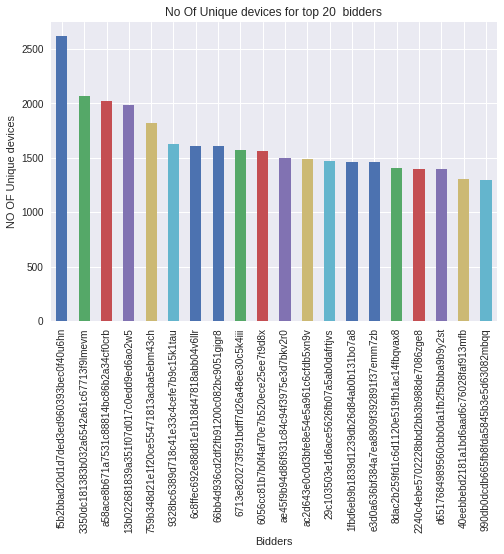

In [0]:
indeces=np.array(bidders_devices).argsort()
unique_auctions=np.array(bidders_devices)[indeces[-20:]]
bidders_sample=np.array(bidders)[indeces[-20:]]
unique_auctions = unique_auctions[::-1]
bidders_sample = bidders_sample[::-1]
s=pd.Series(data=unique_auctions,index=bidders_sample)
i=np.arange(20)
s.plot(kind='bar')
plt.title('No Of Unique devices for top 20  bidders')
plt.xlabel('Bidders')
plt.ylabel('NO OF Unique devices')
plt.show()

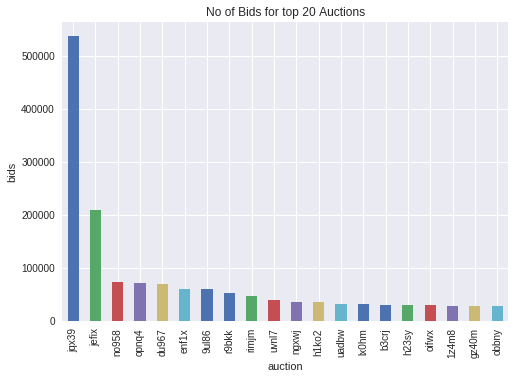

In [0]:

bids['auction'].value_counts()[0:20].plot(kind='bar')
plt.title('No of Bids for top 20 Auctions')
plt.xlabel('auction')
plt.ylabel('bids')
plt.show()

In [0]:
groupby_auction=bids.groupby(by='auction')

In [0]:
bidders_auction=[]
auctions=[]
for auction,frame in groupby_auction:
  auctions.append(auction)
  val=len(frame['bidder_id'].unique())
  bidders_auction.append(val)

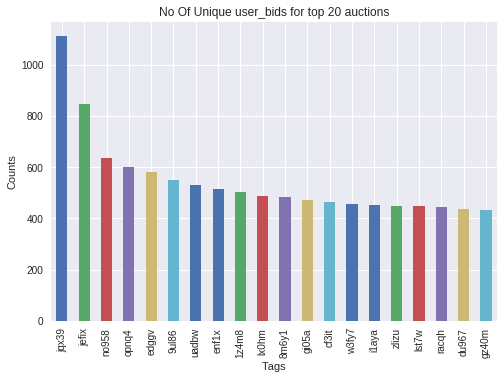

In [0]:
indeces=np.array(bidders_auction).argsort()
unique_bids=np.array(bidders_auction)[indeces[-20:]]
unique_auctions=np.array(auctions)[indeces[-20:]]
unique_bids = unique_bids[::-1]
unique_auctions = unique_auctions[::-1]
s=pd.Series(data=unique_bids,index=unique_auctions)
i=np.arange(20)
s.plot(kind='bar')
plt.title('No Of Unique user_bids for top 20 auctions')
plt.xlabel('Tags')
plt.ylabel('Counts')
plt.show()

<h2>Analysis of Merchendise for Top 20 Auctions</h2>

analysis of merchandise for auction jqx39


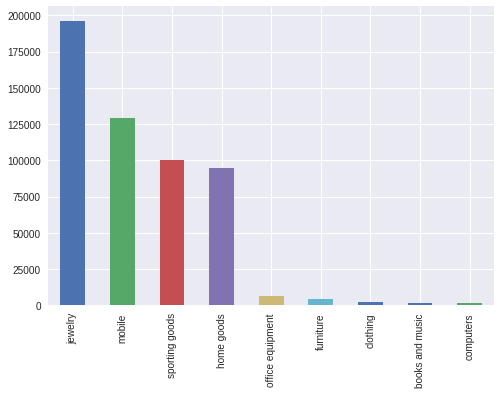

analysis of merchandise for auction jefix


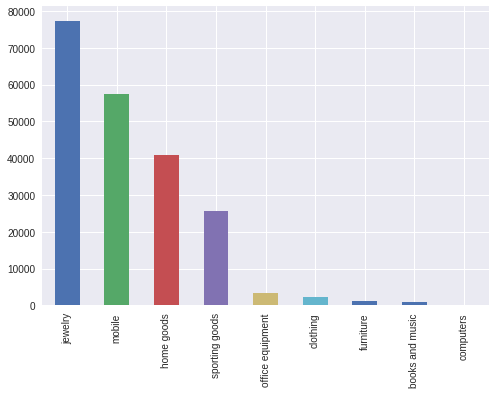

analysis of merchandise for auction no958


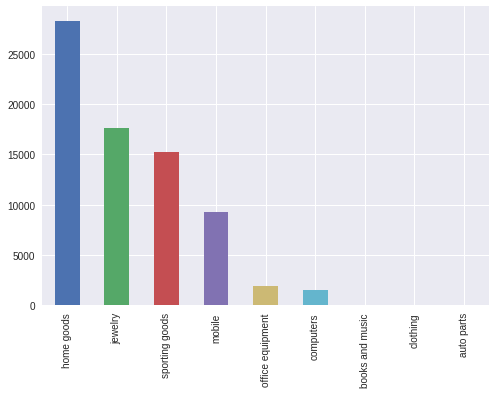

analysis of merchandise for auction opnq4


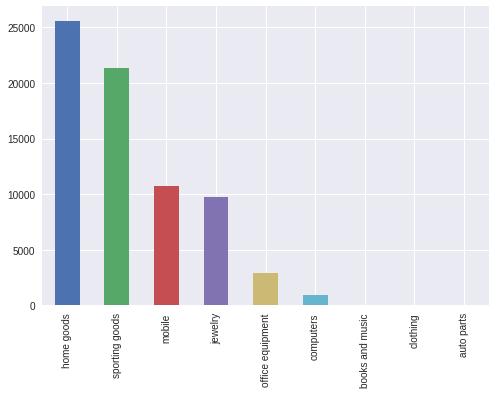

analysis of merchandise for auction edggv


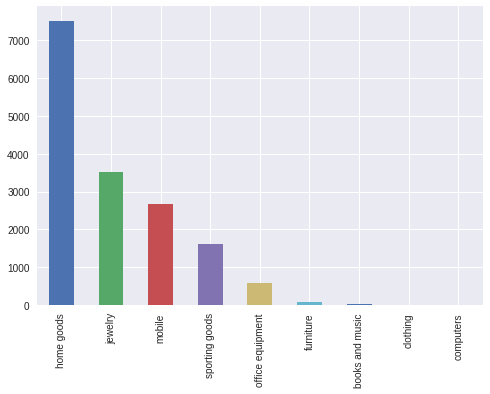

analysis of merchandise for auction 9ul86


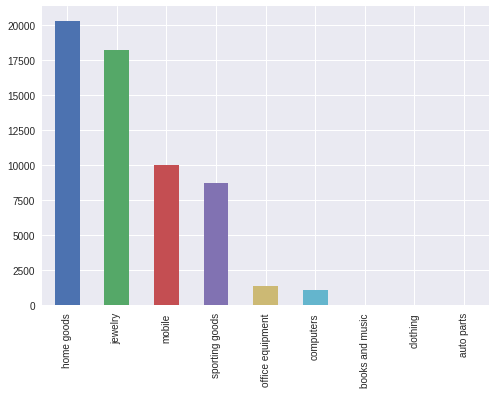

analysis of merchandise for auction uadbw


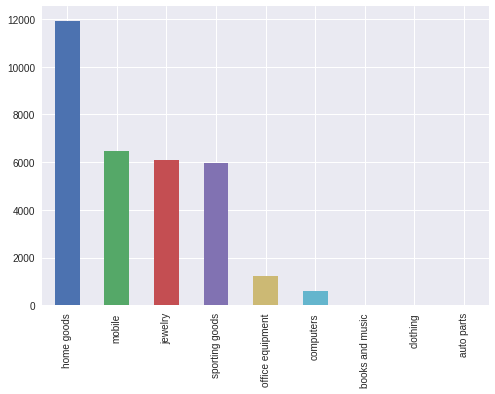

analysis of merchandise for auction enf1x


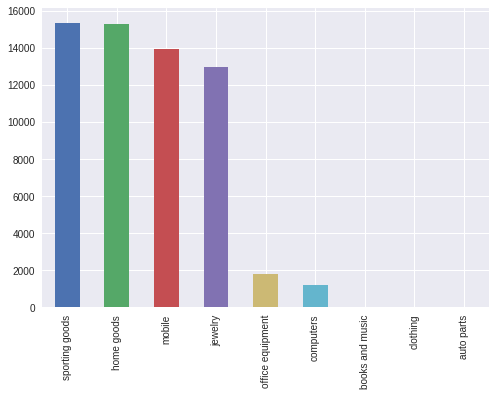

analysis of merchandise for auction 1z4m8


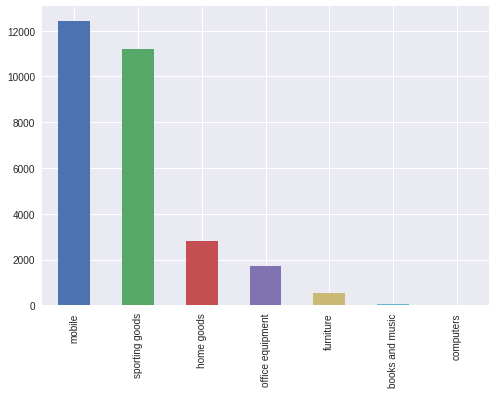

analysis of merchandise for auction lx0hm


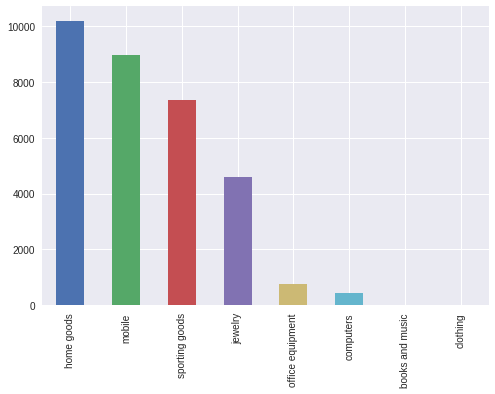

analysis of merchandise for auction 8m6y1


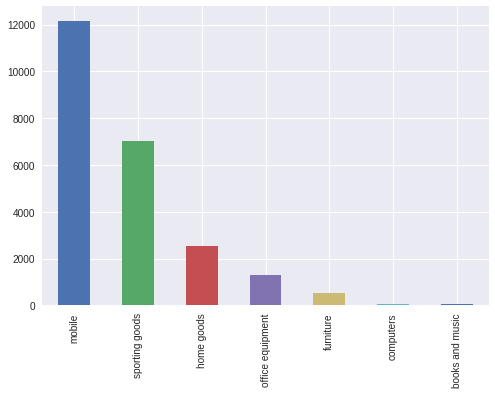

analysis of merchandise for auction gi05a


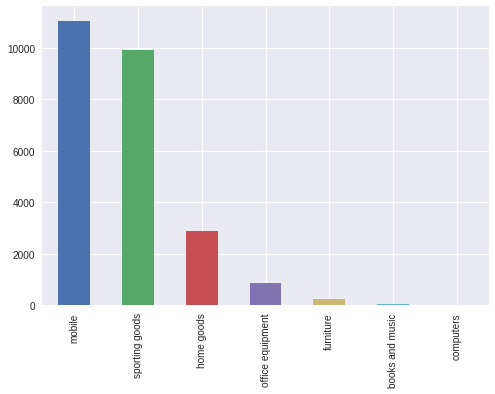

analysis of merchandise for auction cf3it


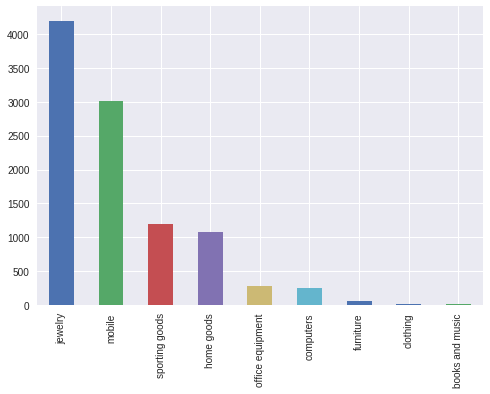

analysis of merchandise for auction w3fy7


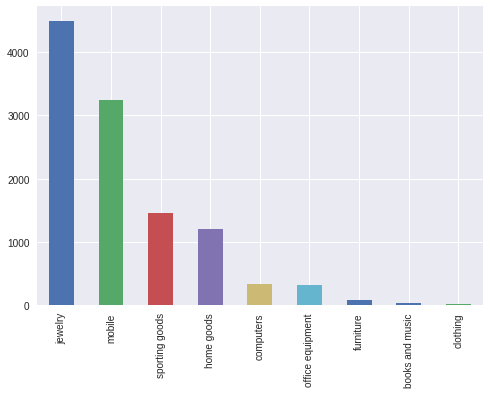

analysis of merchandise for auction i1aya


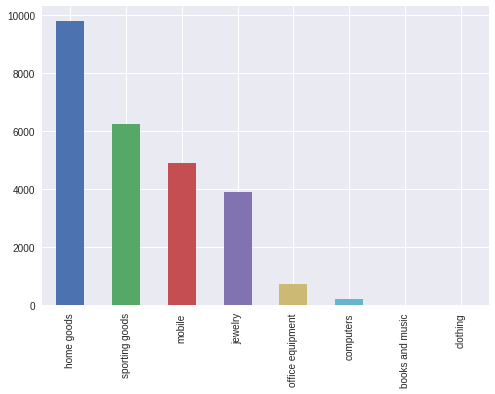

analysis of merchandise for auction zlizu


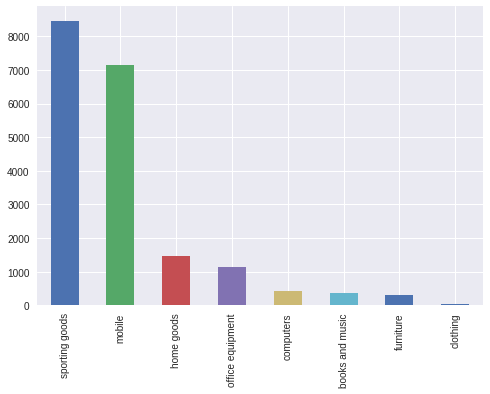

analysis of merchandise for auction lst7w


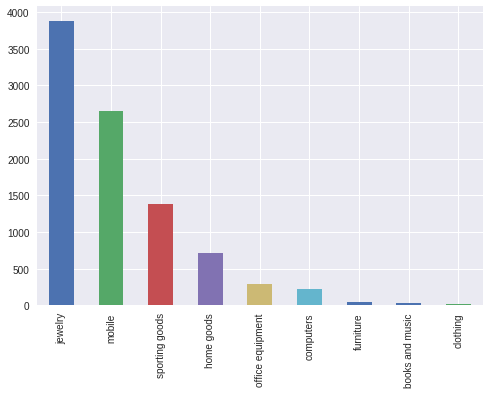

analysis of merchandise for auction racqh


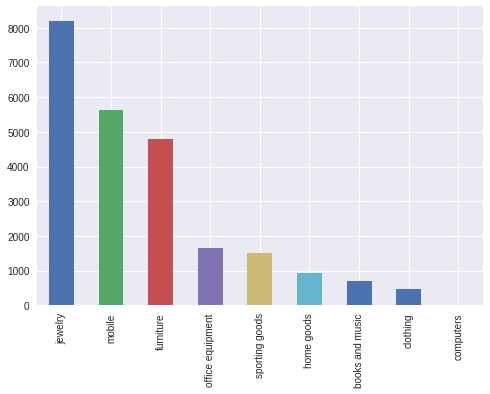

analysis of merchandise for auction du967


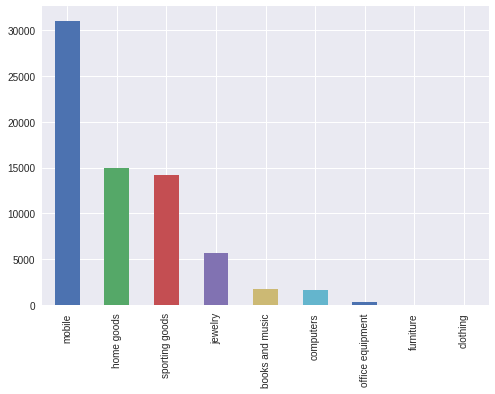

analysis of merchandise for auction gz40m


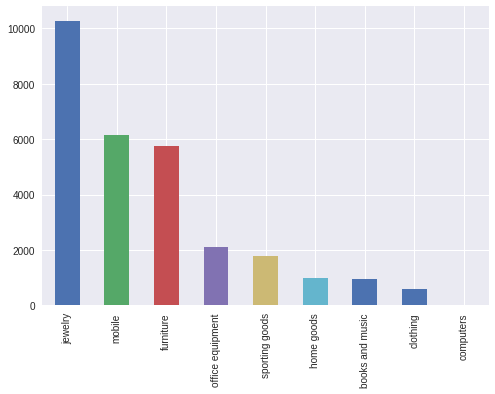

In [0]:
merc_auction=[]
for auction,frame in groupby_auction:
  val=frame['merchandise'].value_counts()
  merc_auction.append(val)
highest_auctions=indeces[-20:][::-1]
for i in highest_auctions:
  print("analysis of merchandise for auction {}".format(auctions[i]))
  merc_auction[i].plot(kind='bar')
  plt.show()

In [0]:
url_auction=[]
for auction,frame in groupby_auction:
  val=len(frame['url'].unique())
  url_auction.append(val)

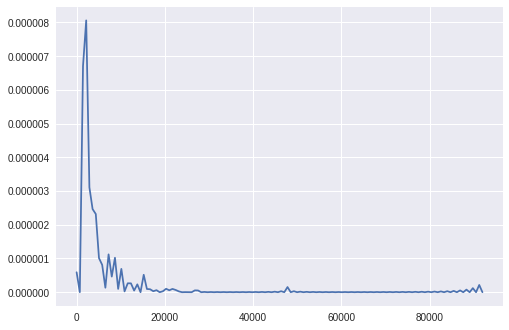

In [0]:
sns.distplot(url_auction,hist=False)

In [0]:
for i in range(10,101,10):
  print("{}th percentile for number of unique urls for  auctions {}".format(i,np.percentile(url_auction,i)))

10th percentile for number of unique urls for  auctions 1.0
20th percentile for number of unique urls for  auctions 3.0
30th percentile for number of unique urls for  auctions 6.0
40th percentile for number of unique urls for  auctions 10.0
50th percentile for number of unique urls for  auctions 18.0
60th percentile for number of unique urls for  auctions 33.0
70th percentile for number of unique urls for  auctions 62.0
80th percentile for number of unique urls for  auctions 122.0
90th percentile for number of unique urls for  auctions 322.0
100th percentile for number of unique urls for  auctions 91974.0


In [0]:
for i in range(0,11):
  print("{} th percentile for number of unique urls for  auctions {}".format(99+i/10,np.percentile(url_auction,99+i/10)))

99.0 th percentile for number of unique urls for  auctions 2744.0
99.1 th percentile for number of unique urls for  auctions 3231.5499999999847
99.2 th percentile for number of unique urls for  auctions 3550.800000000014
99.3 th percentile for number of unique urls for  auctions 4022.349999999993
99.4 th percentile for number of unique urls for  auctions 4335.800000000003
99.5 th percentile for number of unique urls for  auctions 5101.5
99.6 th percentile for number of unique urls for  auctions 6609.799999999723
99.7 th percentile for number of unique urls for  auctions 7967.100000000039
99.8 th percentile for number of unique urls for  auctions 9572.999999999807
99.9 th percentile for number of unique urls for  auctions 13588.750000000013
100.0 th percentile for number of unique urls for  auctions 91974.0


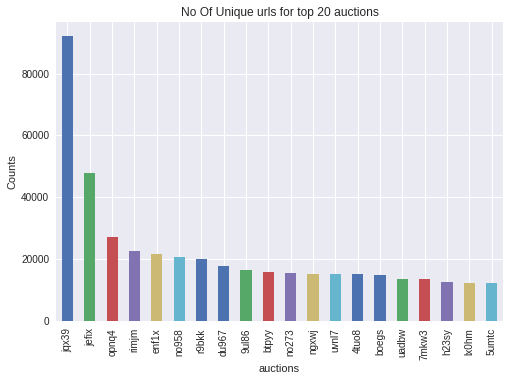

In [0]:
url_indices=np.array(url_auction).argsort()
urlcounts_auction=np.array(url_auction)[url_indices[-20:]][::-1]
url_auctions=np.array(auctions)[url_indices[-20:]][::-1]
s2=pd.Series(data=urlcounts_auction,index=url_auctions)
i=np.arange(20)
s2.plot(kind='bar',)
plt.title('No Of Unique urls for top 20 auctions')
plt.xlabel('auctions')
plt.ylabel('Counts')
plt.show()

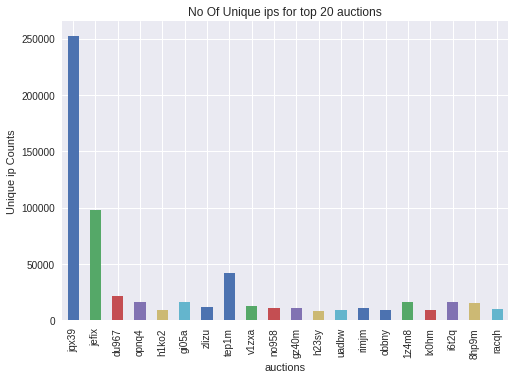

In [0]:
ip_auction=[]
for auction,frame in groupby_auction:
  val=len(frame['ip'].unique())
  ip_auction.append(val)
ip_indices=np.array(ip_auction).argsort()
ipcounts_auction=np.array(ip_auction)[url_indices[-20:]][::-1]
ip_auctions=np.array(auctions)[ip_indices[-20:]][::-1]
s3=pd.Series(data=ipcounts_auction,index=ip_auctions)
i=np.arange(20)
s3.plot(kind='bar',)
plt.title('No Of Unique ips for top 20 auctions')
plt.xlabel('auctions')
plt.ylabel('Unique ip Counts')
plt.show()

In [0]:
phone_auction=[]
for auction,frame in groupby_auction:
  val=len(frame['device'].unique())
  phone_auction.append(val)


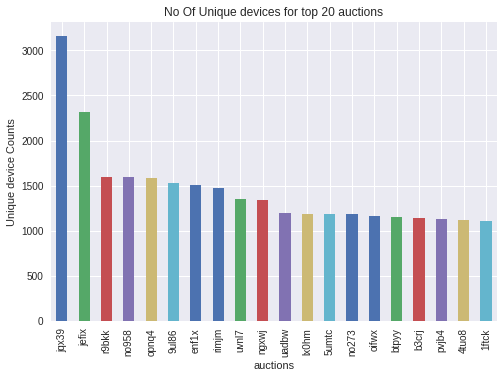

In [0]:
phone_indices=np.array(phone_auction).argsort()
phonecounts_auction=np.array(phone_auction)[phone_indices[-20:]][::-1]
phone_auctions=np.array(auctions)[phone_indices[-20:]][::-1]
s4=pd.Series(data=phonecounts_auction,index=phone_auctions)
i=np.arange(20)
s4.plot(kind='bar',)
plt.title('No Of Unique devices for top 20 auctions')
plt.xlabel('auctions')
plt.ylabel('Unique device Counts')
plt.show()

In [0]:
len(bids['device'].unique())

7351

In [0]:
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


<h3>Let's ffind out Which Devices are mostly used for the bids</h3>

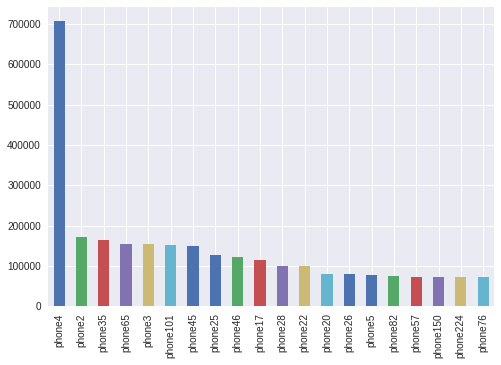

In [0]:
bids['device'].value_counts()[:20].plot(kind='bar')

In [0]:
for i in range(10,101,10):
  print("{} th percentile for how many time each device is being used = {}".format(i,np.percentile(list(bids['device'].value_counts()),i)))

10 th percentile for how many time each device is being used = 1.0
20 th percentile for how many time each device is being used = 2.0
30 th percentile for how many time each device is being used = 3.0
40 th percentile for how many time each device is being used = 5.0
50 th percentile for how many time each device is being used = 11.0
60 th percentile for how many time each device is being used = 22.0
70 th percentile for how many time each device is being used = 51.0
80 th percentile for how many time each device is being used = 145.0
90 th percentile for how many time each device is being used = 634.0
100 th percentile for how many time each device is being used = 706573.0


In [0]:
for i in range(0,11):
  print("{} th percentile for how many time each device is being used = {}".format(99+i/10,np.percentile(bids['device'].value_counts(),99+i/10)))

99.0 th percentile for how many time each device is being used = 19167.0
99.1 th percentile for how many time each device is being used = 22568.050000000057
99.2 th percentile for how many time each device is being used = 25998.799999999952
99.3 th percentile for how many time each device is being used = 32915.800000000025
99.4 th percentile for how many time each device is being used = 35578.70000000017
99.5 th percentile for how many time each device is being used = 39663.0
99.6 th percentile for how many time each device is being used = 50298.80000000004
99.7 th percentile for how many time each device is being used = 69937.99999999952
99.8 th percentile for how many time each device is being used = 75546.60000000075
99.9 th percentile for how many time each device is being used = 124602.15000000285
100.0 th percentile for how many time each device is being used = 706573.0


In [0]:
groupby_device=bids.groupby(by='device')

In [0]:
bidders_phones0=[]
devices0=[]
for auction,frame in groupby_device:
  devices0.append(auction)
  val=len(frame['bidder_id'])
  bidders_phones0.append(val)

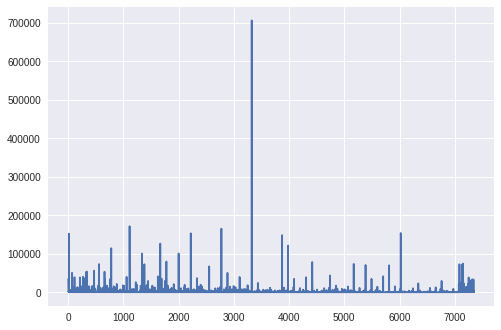

In [0]:
plt.plot(bidders_phones0)

In [0]:
bidders_phones=[]
devices=[]
for auction,frame in groupby_device:
  devices.append(auction)
  val=len(frame['bidder_id'].unique())
  bidders_phones.append(val)

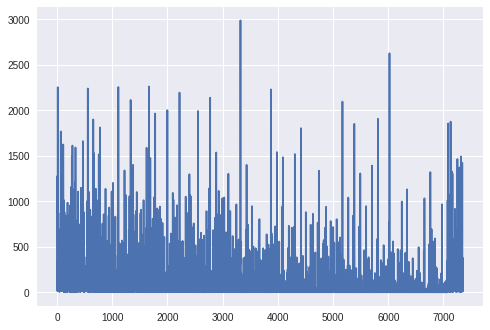

In [0]:
plt.plot(bidders_phones)

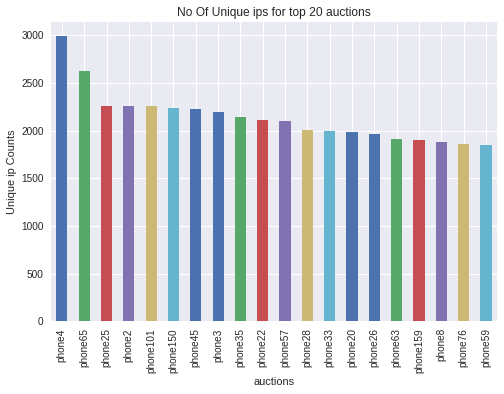

In [0]:
phone_indices=np.array(bidders_phones).argsort()
bidder_phones_s=np.array(bidders_phones)[phone_indices[-20:]][::-1]
phone_names=np.array(devices)[phone_indices[-20:]][::-1]
s3=pd.Series(data=bidder_phones_s,index=phone_names)
i=np.arange(20)
s3.plot(kind='bar',)
plt.title('No Of Unique ips for top 20 auctions')
plt.xlabel('auctions')
plt.ylabel('Unique ip Counts')
plt.show()

In [0]:
c

No of  countries phone4 was used  105


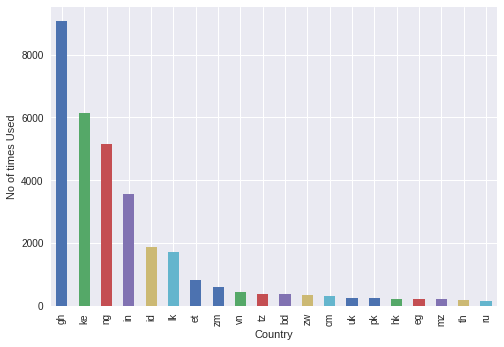

No of  countries phone65 was used  80


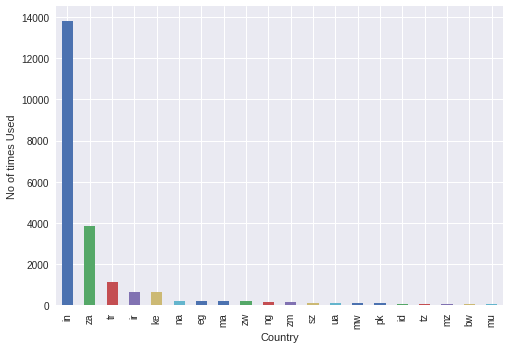

No of  countries phone25 was used  50


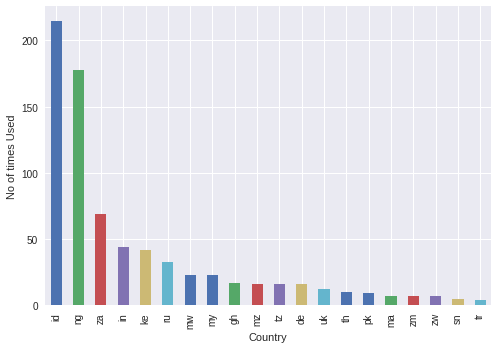

No of  countries phone2 was used  7


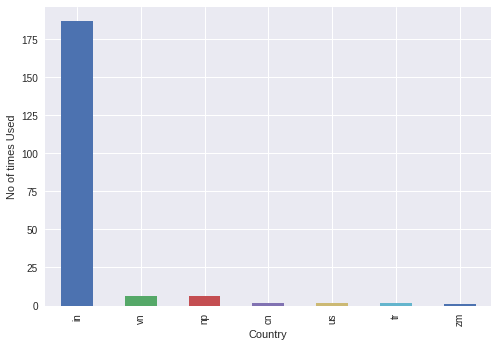

No of  countries phone101 was used  3


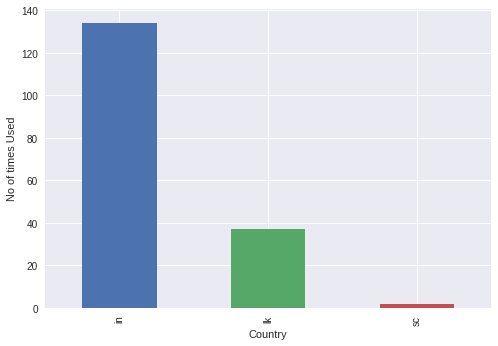

No of  countries phone150 was used  1


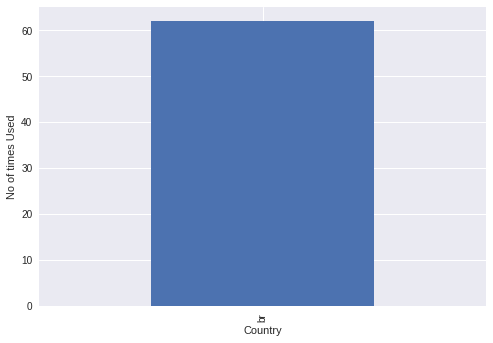

No of  countries phone45 was used  37


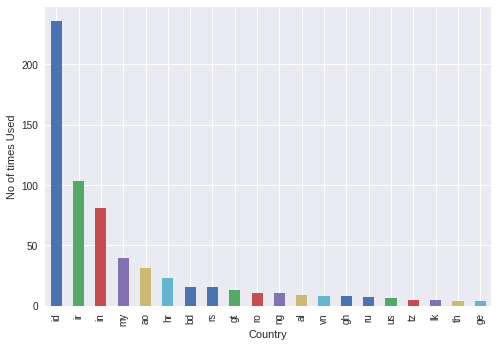

No of  countries phone3 was used  15


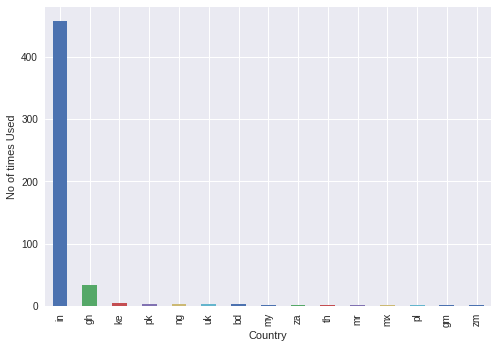

No of  countries phone35 was used  84


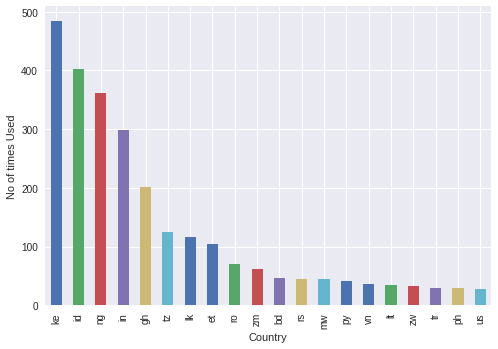

No of  countries phone22 was used  56


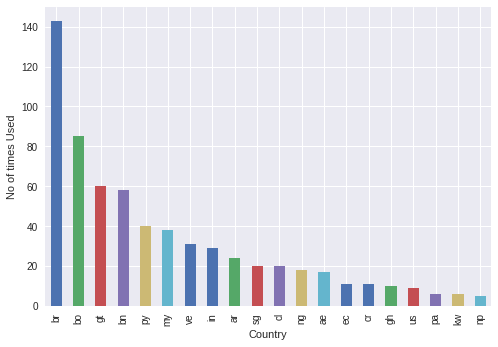

No of  countries phone57 was used  20


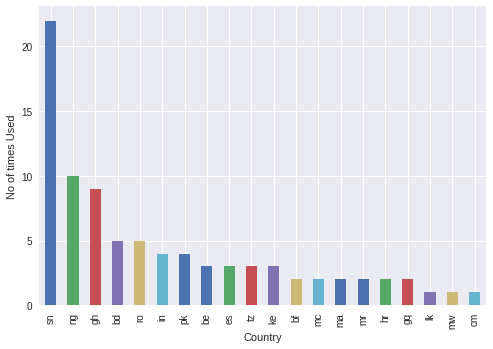

No of  countries phone28 was used  2


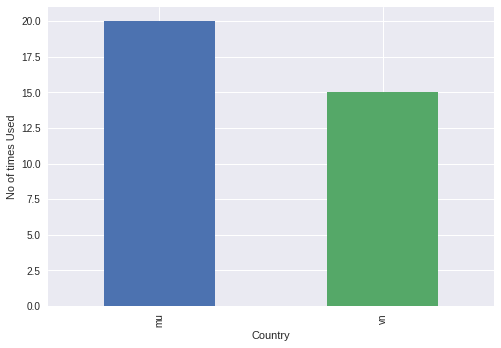

No of  countries phone33 was used  59


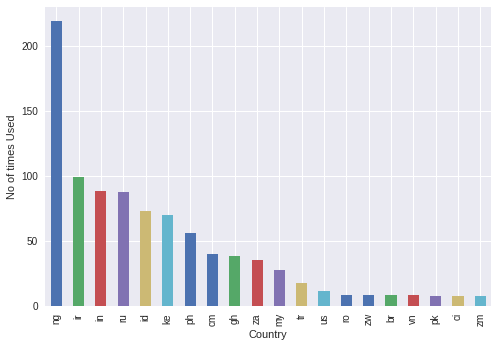

No of  countries phone20 was used  1


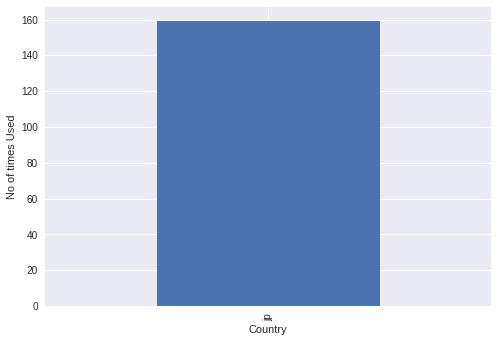

No of  countries phone26 was used  155


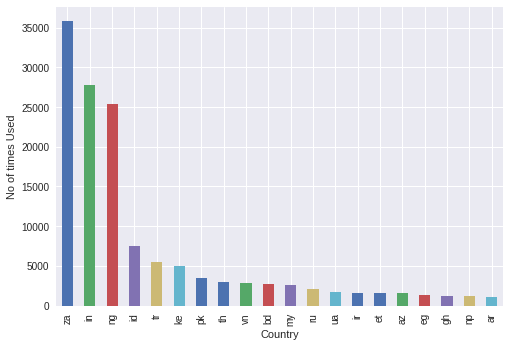

No of  countries phone63 was used  3


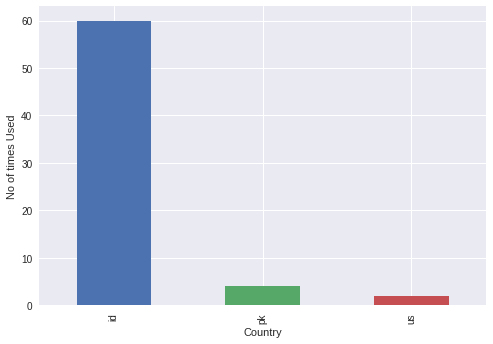

No of  countries phone159 was used  4


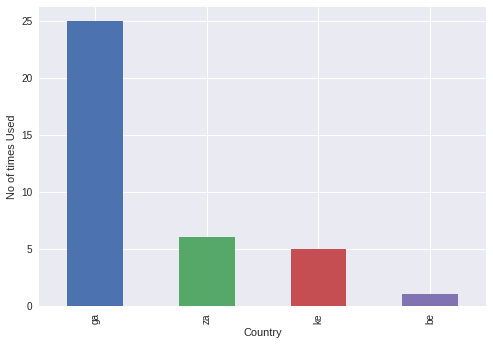

No of  countries phone8 was used  66


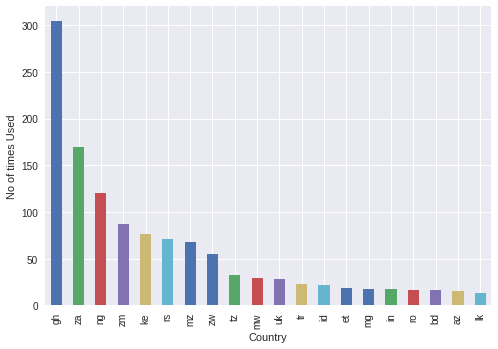

No of  countries phone76 was used  11


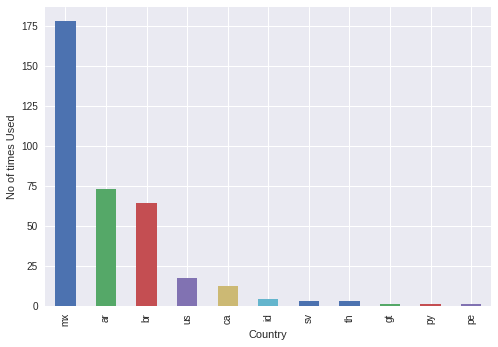

No of  countries phone59 was used  7


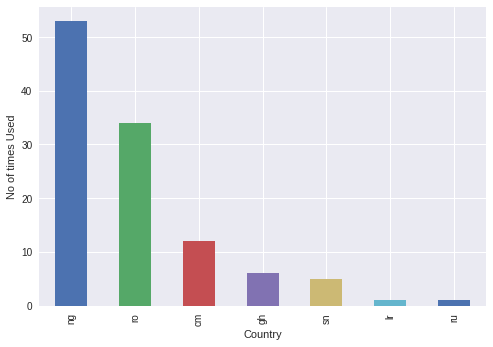

In [0]:

for i,val in enumerate(phone_names):
  print("No of  countries {} was used  {}".format(val,len(phones_countries[i])))
  phones_countries[i][:20].plot(kind='bar')
  plt.xlabel("Country")
  plt.ylabel("No of times Used")
  plt.show()

In [0]:
groupby_bids.head()

In [0]:
len(bids['ip'].unique())

2303991

In [0]:
len(bids['country'].unique())

200

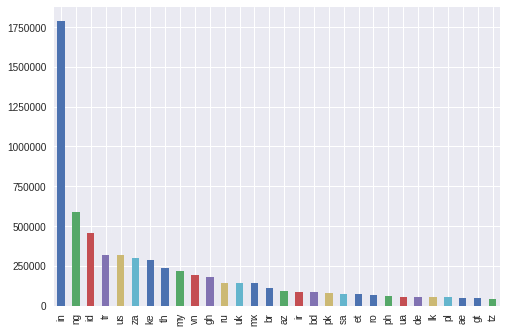

In [0]:
bids['country'].value_counts()[:30].plot(kind='bar')

In [0]:
len(bids['url'].unique())

1786351

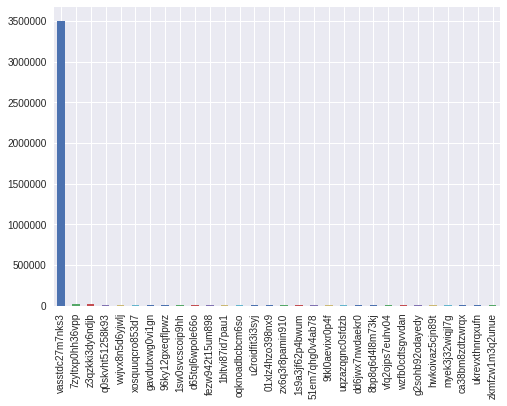

In [0]:
bids['url'].value_counts()[:30].plot(kind='bar')

In [0]:
len(bids['time'].unique())

776529

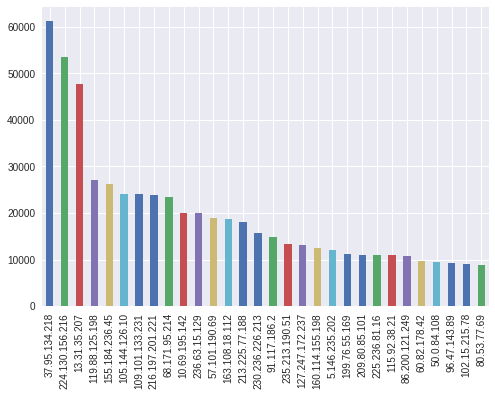

In [0]:
bids['ip'].value_counts()[:30].plot(kind='bar')

Text(0,0.5,'no of times each ip was used')

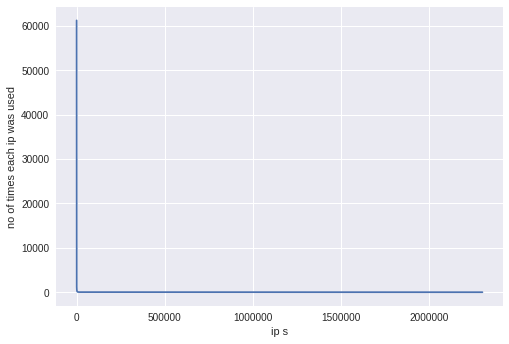

In [0]:
plt.plot(list(bids['ip'].value_counts()))
plt.xlabel("ip s")
plt.ylabel("no of times each ip was used")

In [0]:
ip_bidders=[]
for bidder,frame in groupby_bidderid:
  val=frame['ip'].value_counts()
  ip_bidders.append(val)


 total no of different ip's for bidder  9655ccc7c0c193f1549475f02c54dce45kjw7 is 111918


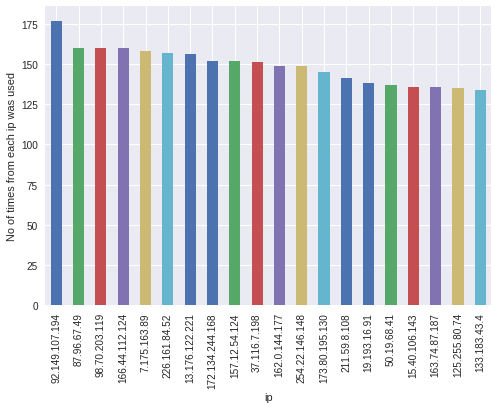

 total no of different ip's for bidder  9328bc6389d718c41e33c4cefe7b9c15k1tau is 27900


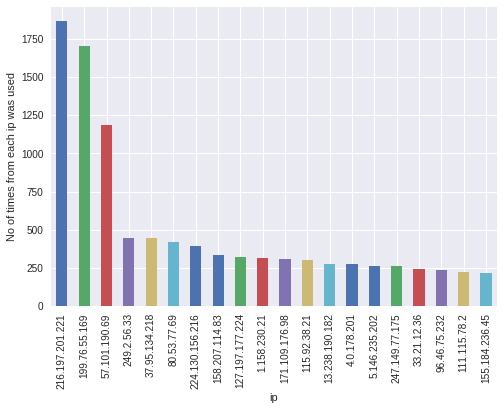

 total no of different ip's for bidder  8e46e0478d1fda88696becb31ff7978am9gxx is 29440


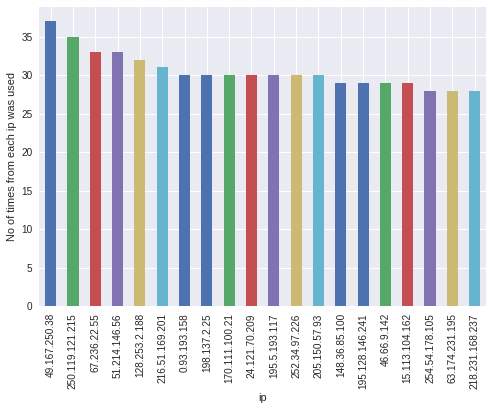

 total no of different ip's for bidder  ac2d643e0c0d3bfe8e54e5a961c6cfdb5xn9v is 30771


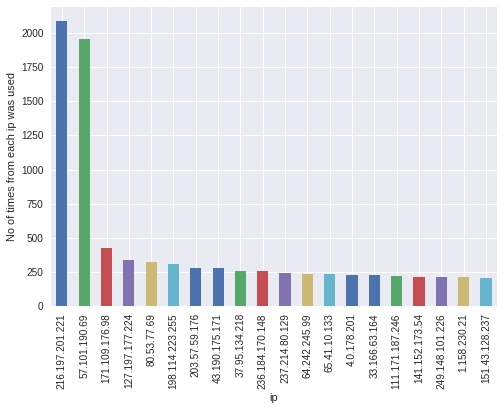

 total no of different ip's for bidder  13b022681839a351f07d017c0edd9ed6ao2w5 is 45984


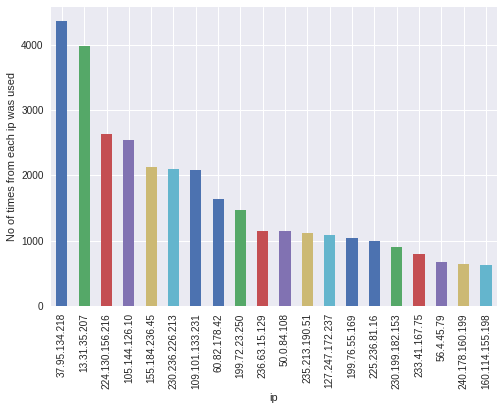

 total no of different ip's for bidder  990db0dcdb665fb8fda5845b3e5d63082mbqq is 15146


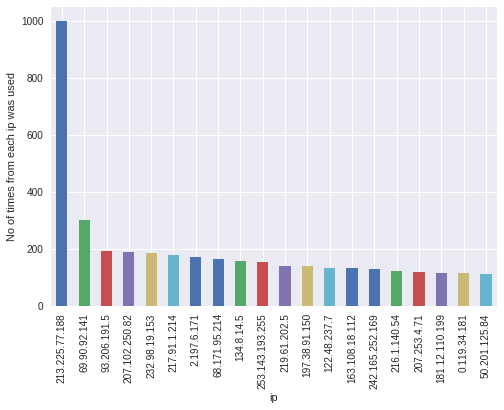

 total no of different ip's for bidder  626159dd6f2228ede002d9f9340f75b7puk8d is 18031


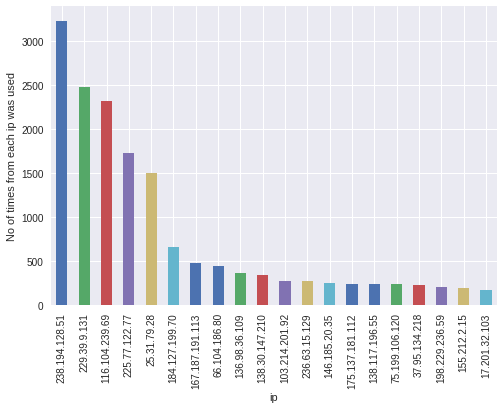

 total no of different ip's for bidder  668d393e858e8126275433046bbd35c6tywop is 10316


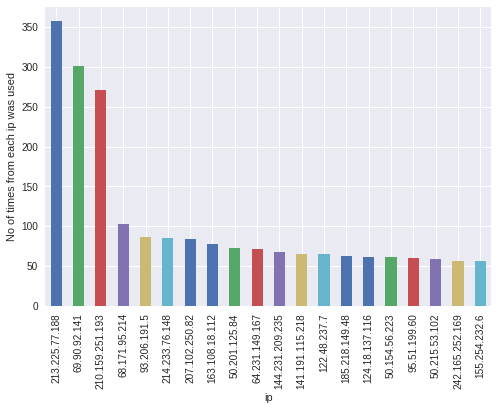

 total no of different ip's for bidder  47460568c86af7e3ef030ab7c892a25b52gnu is 7553


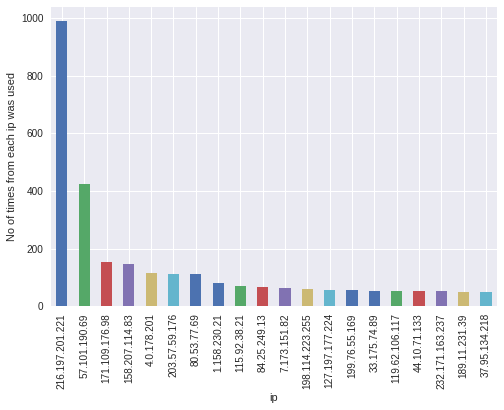

 total no of different ip's for bidder  40eebbebd2181a1bd6aad6c76028faf913mfb is 10070


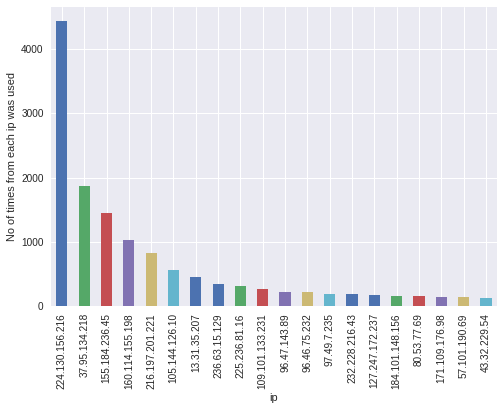

 total no of different ip's for bidder  dc590b0e061dae3fbee53d414abad997ku14d is 10855


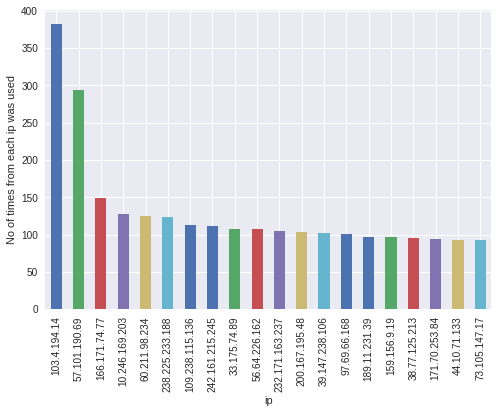

 total no of different ip's for bidder  dbd340def489066ae13ffa5cd68e6d2917li7 is 13275


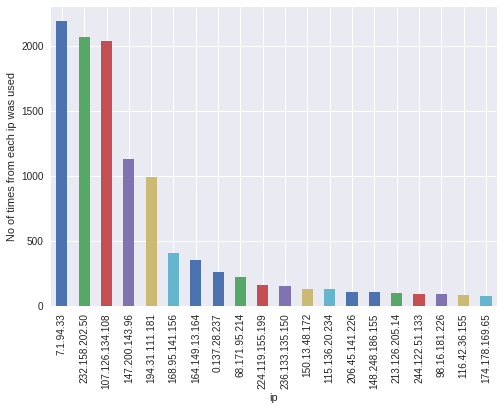

 total no of different ip's for bidder  759b348d21e1f20ce55471813acba5ebm43ch is 20569


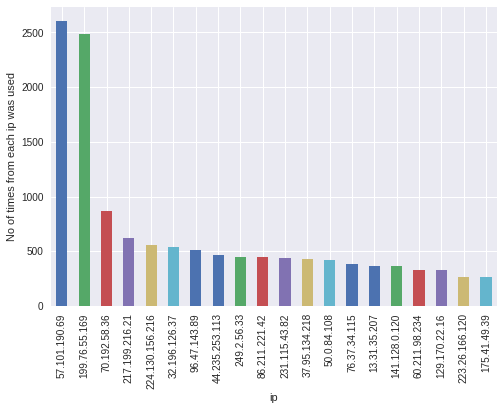

 total no of different ip's for bidder  197e90906939267ace2422e78e8e83889znqp is 109159


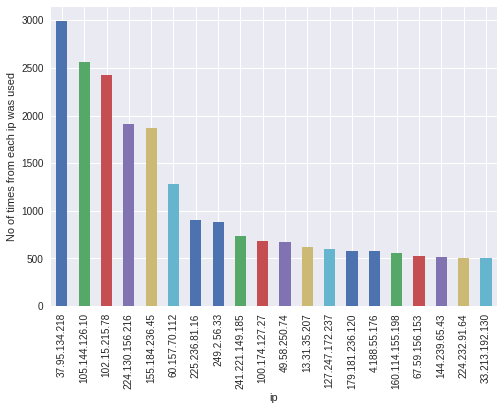

 total no of different ip's for bidder  ae8c2afa894b72e9f05e4ae7af27ef9bp21j8 is 4856


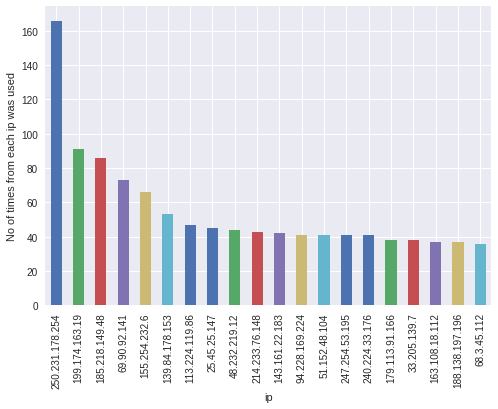

 total no of different ip's for bidder  a1f098bf4b0591c08ee404ed930a50feqd28q is 3832


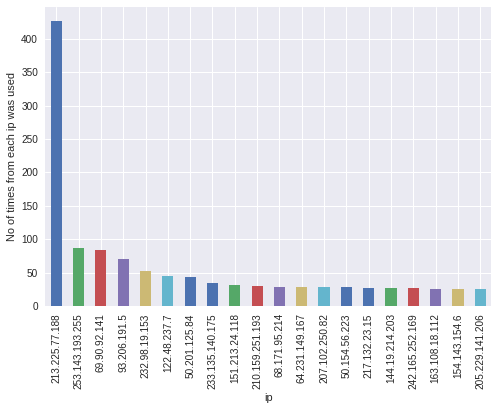

 total no of different ip's for bidder  5fcec311d29fdcdc8f1b662eb2068997xt2oc is 9225


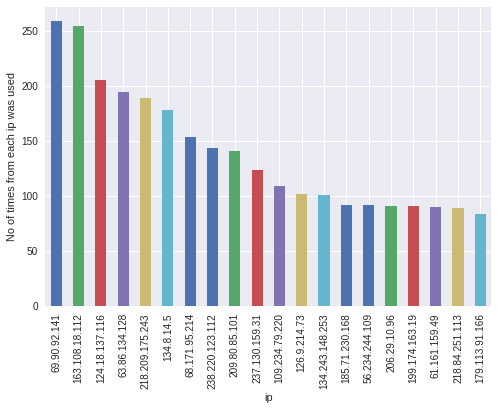

 total no of different ip's for bidder  6e178db6d17d21aa88aaca5bf15c2761lc500 is 11532


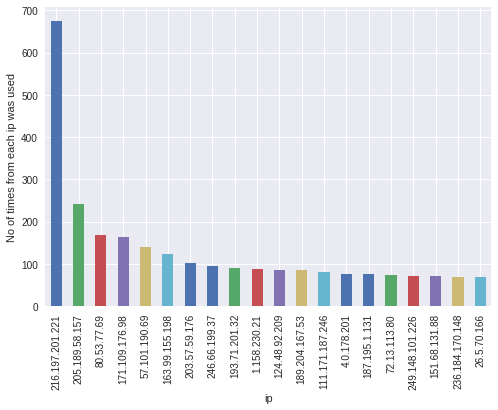

 total no of different ip's for bidder  d6517684989560cbb0da1fb2f5bbba9b9y2st is 12978


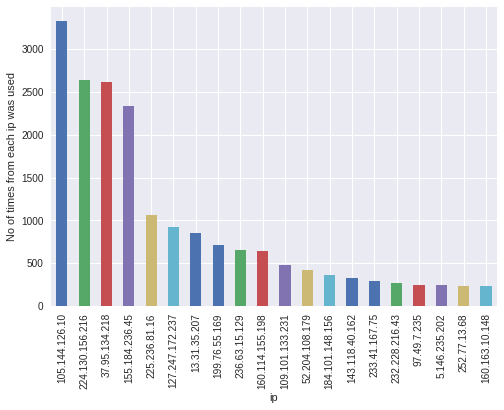

 total no of different ip's for bidder  aa5f360084278b35d746fa6af3a7a1a5ra3xe is 51891


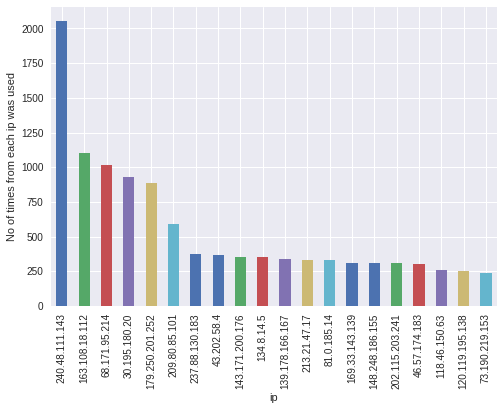

In [0]:
for i,val in enumerate(indeces[-20:][::-1]):
  print(" total no of different ip's for bidder  {} is {}".format(bidders[val],len(ip_bidders[val])))
  ip_bidders[val][:20].plot(kind='bar')
  plt.xlabel("ip")
  plt.ylabel("No of times from each ip was used")
  plt.show()

In [0]:
len(bids)

7656334

<h2>Analyzing More  Based on Bidders_id's with outcomes = 1</h2>

In [0]:
train_bids_robots_ids=list(train_data[train_data['outcome']==1]['bidder_id'])
train_bids_humans_ids=list(train_data[train_data['outcome']!=1]['bidder_id'])

In [0]:
def transform(x):
  if x in train_bids_robots_ids:
    return 1
  else:
    return 0
  
bids['val']=bids['bidder_id'].apply(transform) 
bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,val
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3,0
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,0
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3,0
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3,0
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3,0


In [0]:
bids_by_robots=bids[bids['val']==1]

In [0]:
bids_by_humans=bids[bids['val']!=1]

In [0]:
bids_by_robots.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,val
20,20,af9c96944265cf541b3fe734a057821a825l7,jtxiv,office equipment,phone19,9759243263157894,hr,144.100.75.92,vasstdc27m7nks3,1
36,36,52d8066e28f168e5bee769559ead307e1go7e,165y9,mobile,phone33,9759243315789473,us,240.205.85.43,azl6m5i5tg78c2j,1
47,47,46a28eaed47c29b4fd148a50cde44840u0bsn,5h9tv,mobile,phone44,9759243421052631,in,94.210.47.16,4efsnqzirqtxasm,1
55,55,b1863365ae232a316eb946ba56a29415m0gdz,c8cgg,home goods,phone4,9759243473684210,vn,208.207.224.110,vasstdc27m7nks3,1
107,107,e12177ff9c1a8413996f7b1a590980c82ofeo,fi8mh,sporting goods,phone81,9759243736842105,uk,91.53.170.204,457usxujudk2tc9,1


In [0]:
len(bids_by_robots)

412416

In [0]:
bids_by_robots_groupby_bidder_id=bids_by_robots.groupby('bidder_id')
bids_by_humans_groupby_bidder_id=bids_by_humans.groupby('bidder_id')
bidders=[]
auctions=[]
phones=[]
country=[]
ips=[]
urls=[]
for bidder,frame in bids_by_robots_groupby_bidder_id:
  bidders.append(bidder)
  auctions.append(len(frame['auction'].unique()))
  phones.append(len(frame['device'].unique()))
  country.append(len(frame['country'].unique()))
  ips.append(len(frame['ip'].unique()))
  urls.append(len(frame['url'].unique()))
bidders0=[]
auctions0=[]
phones0=[]
country0=[]
ips0=[]
urls0=[]
for bidder,frame in bids_by_humans_groupby_bidder_id:
  bidders0.append(bidder)
  auctions0.append(len(frame['auction'].unique()))
  phones0.append(len(frame['device'].unique()))
  country0.append(len(frame['country'].unique()))
  ips0.append(len(frame['ip'].unique()))
  urls0.append(len(frame['url'].unique()))


In [0]:
data_frame0=pd.DataFrame({'no_auc':auctions0,'no_phones':phones0,'no_country':country0,'no_ips':ips0,'no_urls':urls0},index=bidders0)
data_frame0['val']=0
data_frame=pd.DataFrame({'no_auc':auctions,'no_phones':phones,'no_country':country,'no_ips':ips,'no_urls':urls},index=bidders)
data_frame['val']=1

In [0]:
df=pd.concat([data_frame0,data_frame])

In [0]:
df.head()

,no_auc,no_country,no_ips,no_phones,no_urls,val
001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,0
002d229ffb247009810828f648afc2ef593rb,1,1,1,2,1,0
0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,0
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,3,1,3,3,2,0
00486a11dff552c4bd7696265724ff81yeo9v,13,1,10,8,7,0


In [0]:
import warnings
warnings.filterwarnings('ignore')

From no of Different countries Each User was Participated


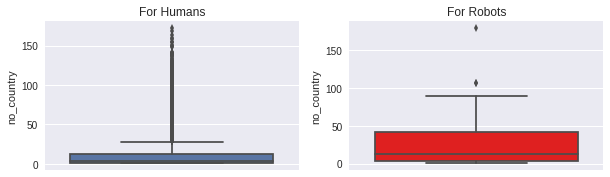

In [0]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.set_title("For Humans")
ax2.set_title("For Robots")
sns.boxplot(y=data_frame0['no_country'],ax=ax1)
sns.boxplot(y=data_frame['no_country'],ax=ax2,color='red')
print("From no of Different countries Each User was Participated")
print("="*60)


From no of Different Auctions Each User was Participated


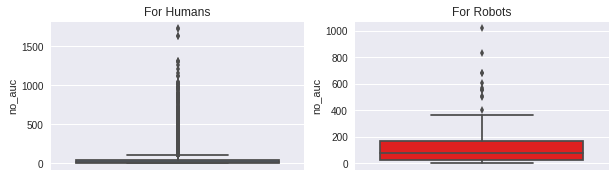

In [0]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.set_title("For Humans")
ax2.set_title("For Robots")
sns.boxplot(y=data_frame0['no_auc'],ax=ax1)
sns.boxplot(y=data_frame['no_auc'],ax=ax2,color='red')
print("From no of Different Auctions Each User was Participated")
print("="*60)

From no of Different ip's Each User was Participated


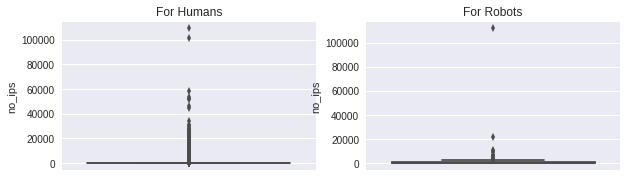

In [0]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.set_title("For Humans")
ax2.set_title("For Robots")
sns.boxplot(y=data_frame0['no_ips'],ax=ax1)
sns.boxplot(y=data_frame['no_ips'],ax=ax2,color='red')
print("From no of Different ip's Each User was Participated")
print("="*60)

From no of Different URL's Each User was Participated


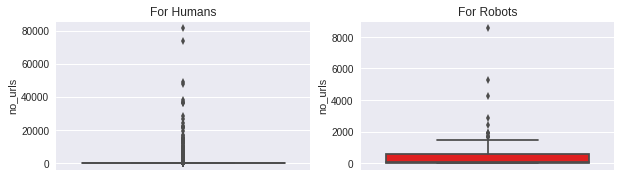

In [0]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.set_title("For Humans")
ax2.set_title("For Robots")
sns.boxplot(y=data_frame0['no_urls'],ax=ax1)
sns.boxplot(y=data_frame['no_urls'],ax=ax2,color='red')
print("From no of Different URL's Each User was Participated")
print("="*60)

 no of Different phones Each User  used


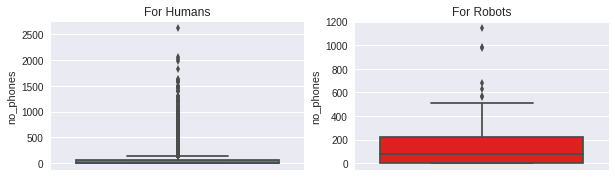

In [0]:
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.set_title("For Humans")
ax2.set_title("For Robots")
sns.boxplot(y=data_frame0['no_phones'],ax=ax1)
sns.boxplot(y=data_frame['no_phones'],ax=ax2,color='red')
print(" no of Different phones Each User  used")
print("="*60)

 Countries with more number of Robot bids , Human bids


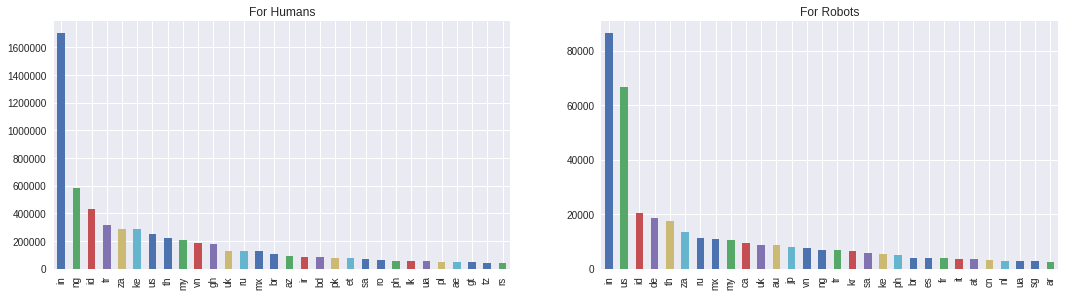

In [0]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.set_title("For Humans")
ax2.set_title("For Robots")
bids[bids['val']==1]['country'].value_counts()[0:30].plot(kind='bar',ax=ax2)
bids[bids['val']==0]['country'].value_counts()[0:30].plot(kind='bar',ax=ax1)
print(" Countries with more number of Robot bids , Human bids")
print("="*60)

 Auctions with more number of Robot bids , Human bids


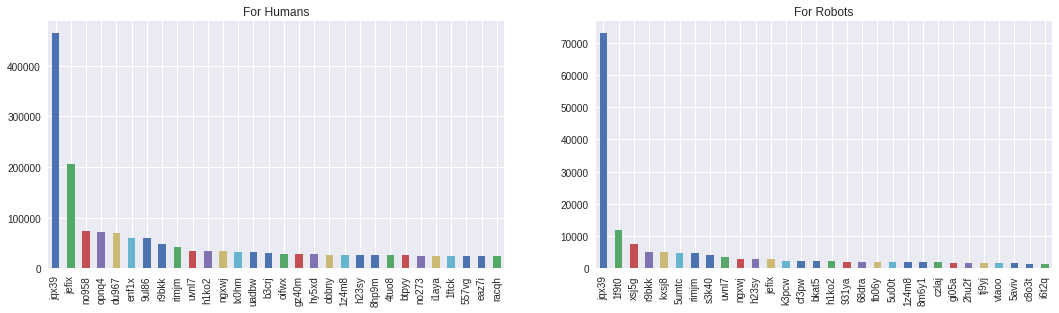

In [0]:
fig = plt.figure(figsize=(18,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.set_title("For Humans")
ax2.set_title("For Robots")
bids[bids['val']==1]['auction'].value_counts()[0:30].plot(kind='bar',ax=ax2)
bids[bids['val']==0]['auction'].value_counts()[0:30].plot(kind='bar',ax=ax1)
print(" Auctions with more number of Robot bids , Human bids")
print("="*60)

 Merchandise with more number of Robot bids , Human bids


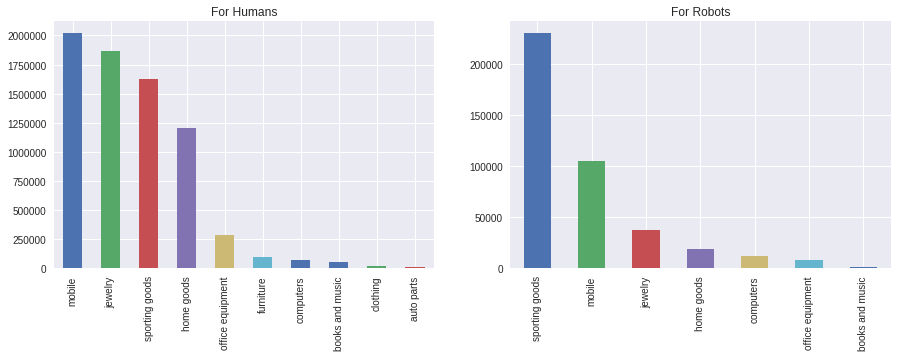

In [0]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.set_title("For Humans")
ax2.set_title("For Robots")
bids[bids['val']==1]['merchandise'].value_counts().plot(kind='bar',ax=ax2)
bids[bids['val']==0]['merchandise'].value_counts().plot(kind='bar',ax=ax1)
print(" Merchandise with more number of Robot bids , Human bids")
print("="*60)

In [0]:
bids_by_robots_auction=bids_by_robots.groupby('auction')
bids_by_humans_auction=bids_by_humans.groupby('auction')

In [0]:
auctions0=[]
bidder_count0=[]
for auction,frame in bids_by_humans_auction:
  val=frame['bidder_id'].value_counts()
  auctions0.append(auction)
  bidder_count0.append(val)
auctions1=[]
bidder_count1=[]
for auction,frame in bids_by_robots_auction:
  val=frame['bidder_id'].value_counts()
  auctions1.append(auction)
  bidder_count1.append(val)
  
  
  

Analyzing a particular auction jqx39 on how many times each individual has bidded b/w humans and robots


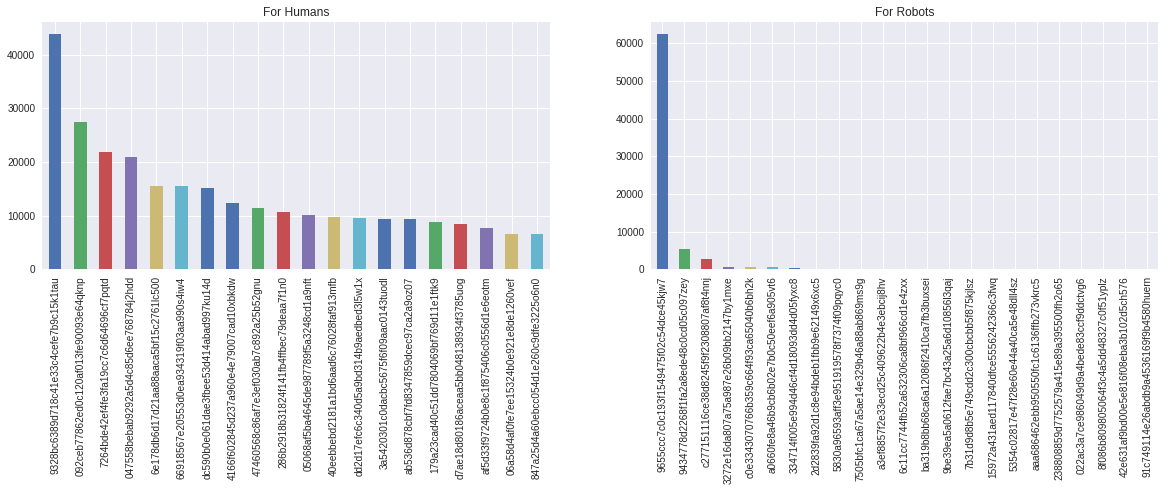

In [0]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.set_title("For Humans")
ax2.set_title("For Robots")
bidder_count0[auctions0.index('jqx39')][0:20].plot(kind='bar',ax=ax1)
bidder_count1[auctions1.index('jqx39')].plot('bar',ax=ax2)
print("Analyzing a particular auction jqx39 on how many times each individual has bidded b/w humans and robots")
print("="*100)

Analyzing a particular auction jefix on how many times each individual has bidded b/w humans and robots


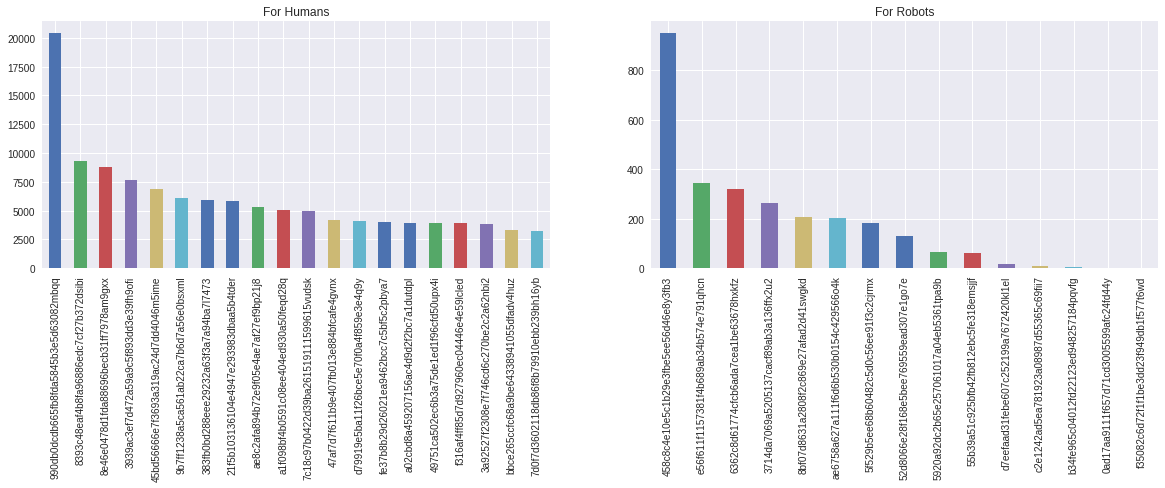

In [0]:
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax1.set_title("For Humans")
ax2.set_title("For Robots")
bidder_count0[auctions0.index('jefix')][0:20].plot(kind='bar',ax=ax1)
bidder_count1[auctions1.index('jefix')].plot('bar',ax=ax2)
print("Analyzing a particular auction jefix on how many times each individual has bidded b/w humans and robots")
print("="*100)

In [0]:
bidders_auction=bids.groupby(['bidder_id','auction'])

<h1>Feature Engeneering</h1>

From Above Exploratory Data Analysis We can Came up with some Features like

"bids"  : Total number of Bids



"no_auctions" : Distinct auctions the bidder participated in

"no_devices" : Distinct devices used by the bidder

 "no_countries" : Number of countries the bidder participated from
 
"no_ips" : Number of IPs bidder participated with

 "merchandise" : Type of Merchandise bidder participated

"Bids_per_auction" : Bids made in every auction

"Bids_per_device" : Bids made per device

"Bids_per_country" : Bids made per country

"Bids_per_IP" : Bids made per IP